In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("athlete_events.csv")
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
#insight
#medal has a lot of null data

In [15]:
df[df.duplicated()]
df.drop(columns=["ID"], inplace = True , axis=1)
df1 = df[~df.duplicated()]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    269731 non-null  object 
 1   Sex     269731 non-null  object 
 2   Age     260416 non-null  float64
 3   Height  210917 non-null  float64
 4   Weight  208204 non-null  float64
 5   Team    269731 non-null  object 
 6   NOC     269731 non-null  object 
 7   Games   269731 non-null  object 
 8   Year    269731 non-null  int64  
 9   Season  269731 non-null  object 
 10  City    269731 non-null  object 
 11  Sport   269731 non-null  object 
 12  Event   269731 non-null  object 
 13  Medal   39772 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 30.9+ MB


In [16]:
df1.isnull().sum()

Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

In [17]:
#insight
#missing values in:
#Age         9315
#Height     58814
#Weight     61527
#Medal     229959

In [22]:
# spliting the date to numerical and categorical
df1_numerical = df1.select_dtypes(include = "number")
df1_category = df1.select_dtypes(include = "object")

gender = df1['Sex'].value_counts()
print(gender)
number_of_Sports = len(df1_category['Sport'].unique())
Sport_count = df1_category['Sport'].value_counts()
df1_numerical.info()

Sex
M    195353
F     74378
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Age     260416 non-null  float64
 1   Height  210917 non-null  float64
 2   Weight  208204 non-null  float64
 3   Year    269731 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 10.3 MB


In [30]:
#insight 
# for each column :
# 1) bar chart
# 2) pie chart


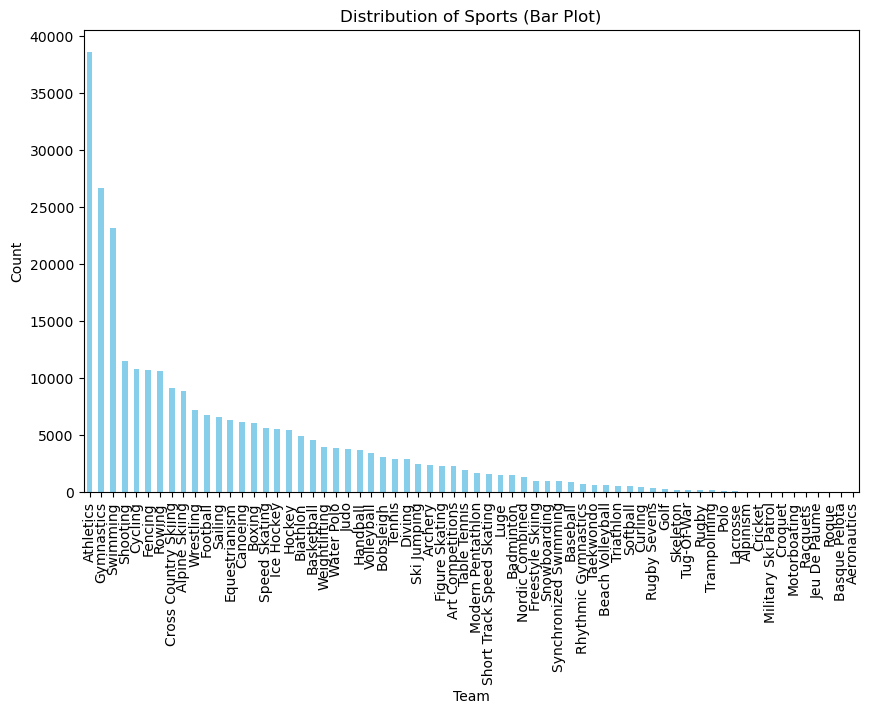

In [31]:
plt.figure(figsize=(10, 6))
Sport_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sports (Bar Plot)')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

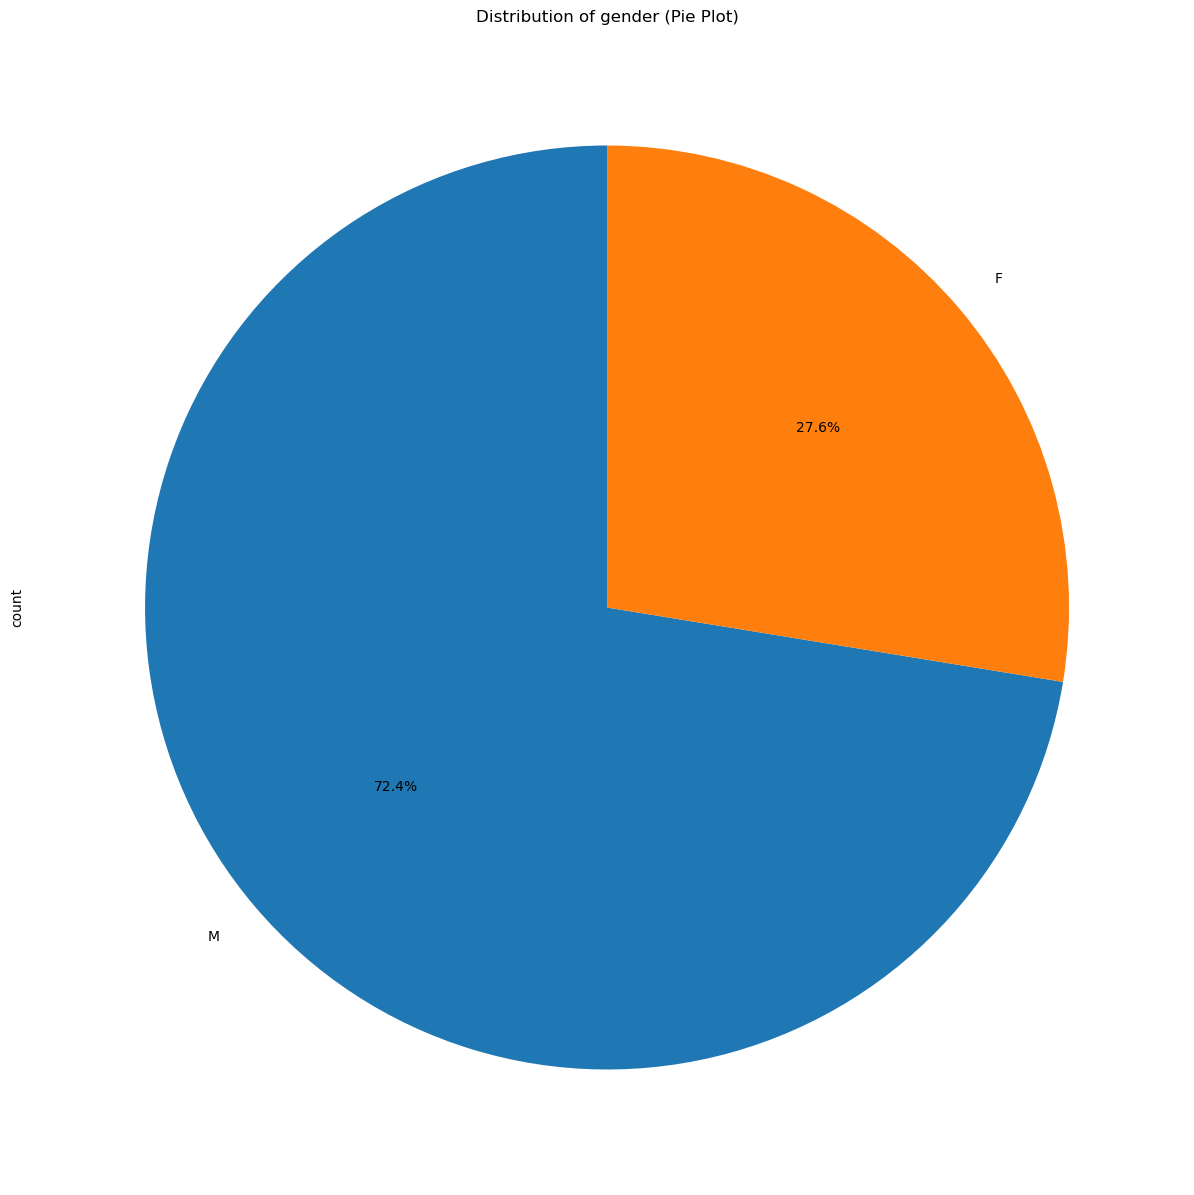

In [32]:
plt.figure(figsize=(15, 15))
gender.plot.pie(autopct='%1.1f%%', startangle = 90)
plt.title('Distribution of gender (Pie Plot)')
plt.show()

In [33]:
#insight 
# for each column :
# 1) disturbution -> Hist and KDE
# 2) outlyers -> box
#for columns togather
# heat map

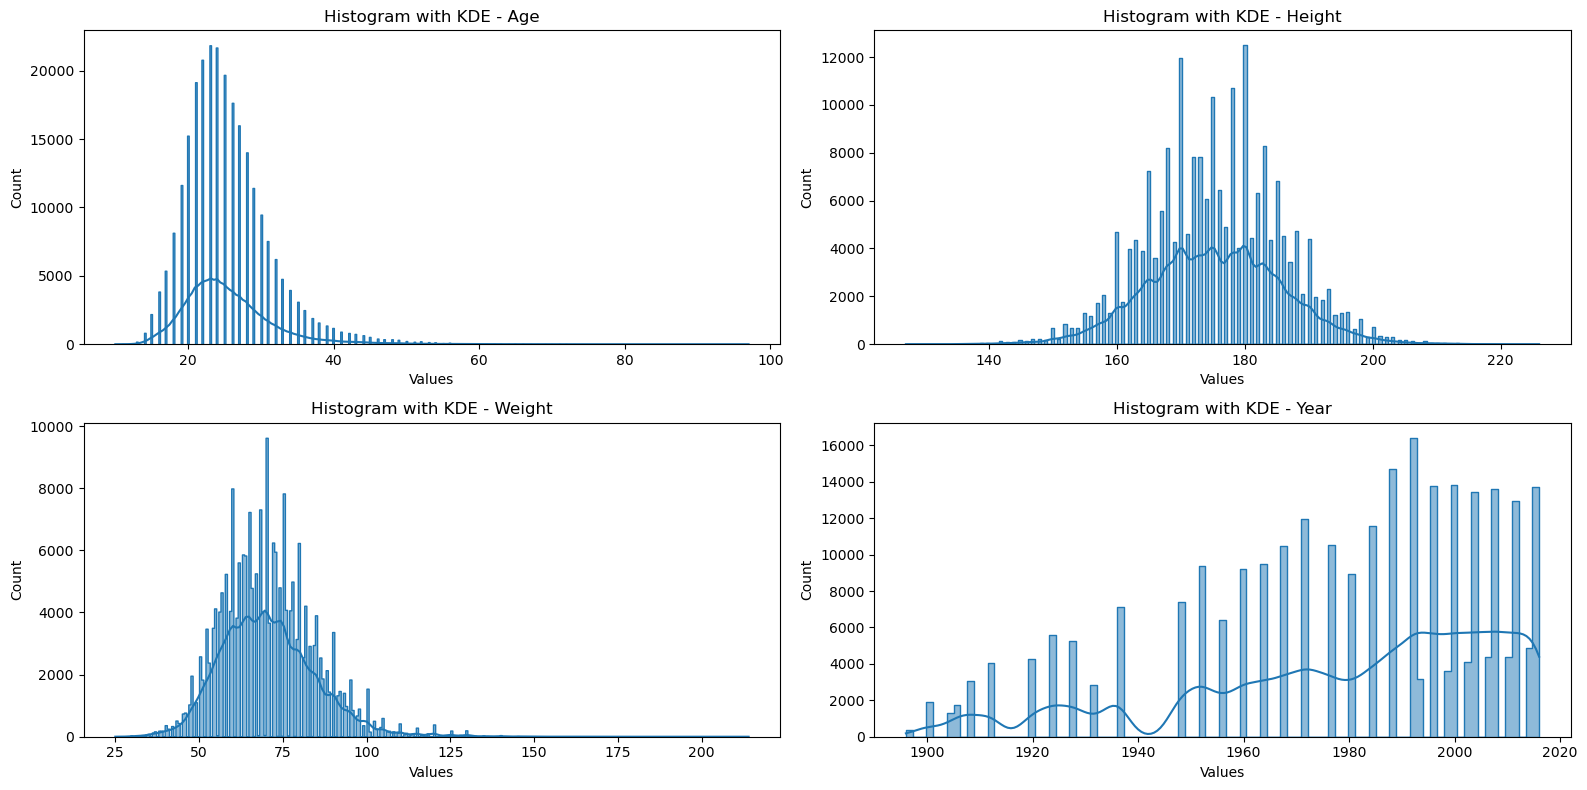

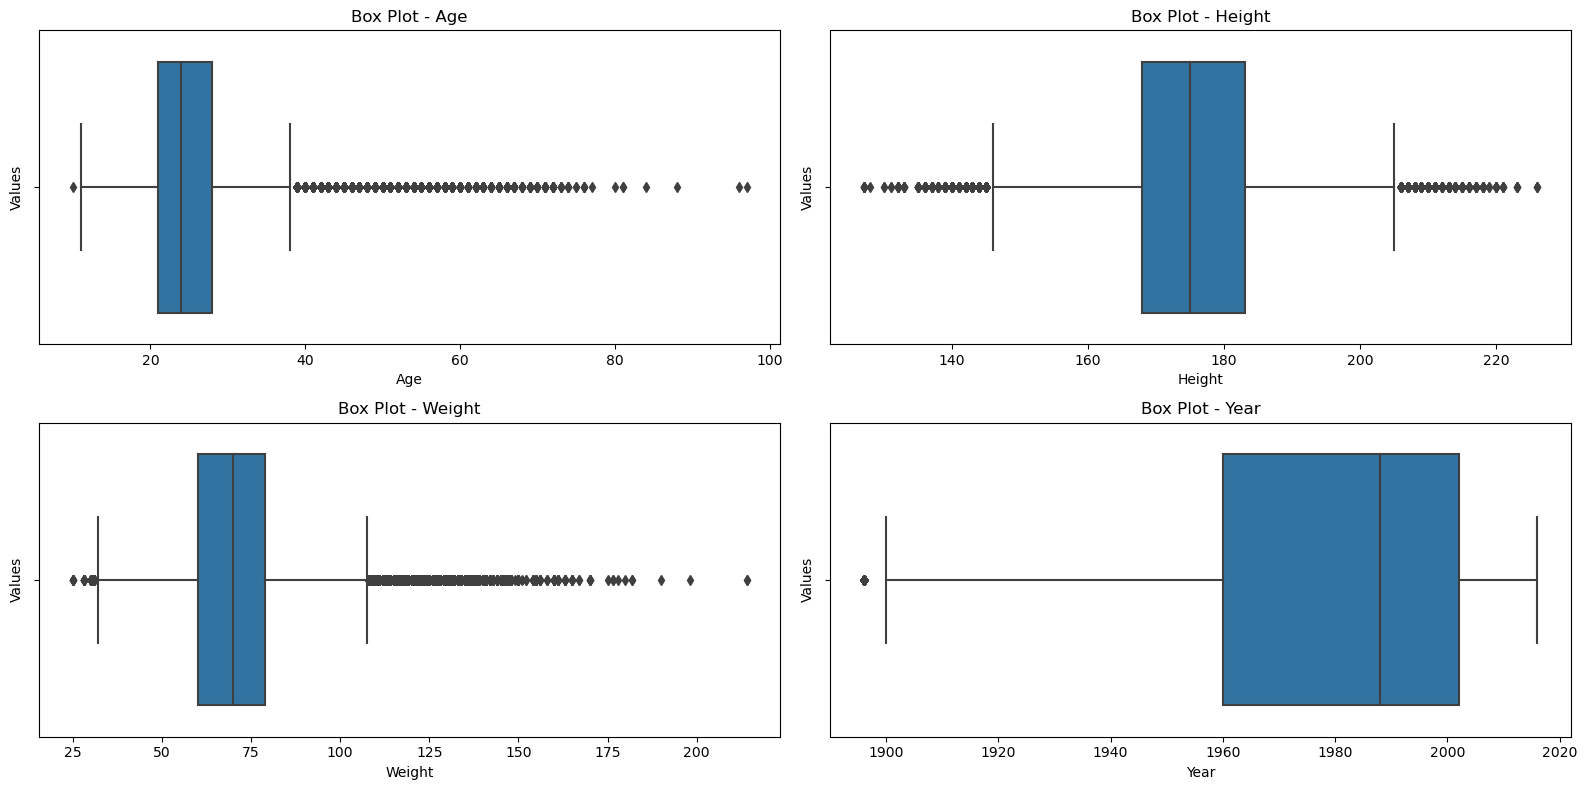

In [34]:
plt.figure(figsize=(16, 8))

for i, column in enumerate(df1_numerical.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df1_numerical[column].dropna(), kde=True, element='step')
    plt.title(f'Histogram with KDE - {column}')
    plt.xlabel('Values')

plt.tight_layout()
plt.show()

# Box plots for each numerical column
plt.figure(figsize=(16, 8))

for i, column in enumerate(df1_numerical.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df1_numerical[column])
    plt.title(f'Box Plot - {column}')
    plt.ylabel('Values')

plt.tight_layout()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABjMAAAMWCAYAAAC0nXRxAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAACKiklEQVR4nOzdfZxXc/4//ue7qZkpKlRKUq6SJVFrsVgVQsiya6MLFx+si3WZy3Utu1jsxq6r5JPaFrkMsULLxLpYoo1tWRf7jbSKRZQo1ZzfH/3m/endzLznopnmNHO/325zu3XO67zPeZ33vJr3eZ7H+5yTSZIkCQAAAAAAgJRq1tAdAAAAAAAAyEeYAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAHQQMaPHx+ZTCbnp0OHDtGvX794/PHH13p/pk2bltOXgoKC6NixY/zsZz+Lt99+O7vcBx98EJlMJsaPH1/jbbz11ltxxRVXxAcffFB3Ha/AZ599FkVFRZHJZOK1116r120BAEB9UC/UvUwmE6eddlqFbQ8++GBkMpmYNm1ajddb9t7U5rVl79dvf/vbKpd94okn4oorrqjxNgAaC2EGQAMbN25cvPzyy/HSSy/FmDFjoqCgIAYNGhSPPfZYg/Tn6quvjpdffjlKSkriggsuiKlTp8Yee+wR//nPf9Z43W+99VaMHDmy3sOMP/3pT/Hdd99FRMTYsWPrdVsAAFCf1Avp16dPn3j55ZejT58+9bqdJ554IkaOHFmv2wBIs+YN3QGApq5nz56x8847Z6cPOOCA2HDDDWPixIkxaNCgtd6f7t27x2677RYREXvttVdssMEGcfzxx8f48ePj4osvXuv9qY0777wzNt544+jWrVtMnDgxRo0aFS1btmzobgEAQI2pF9KvTZs22fcEgPrjygyAlCkuLo7CwsJo0aJFzvwvvvgifvGLX8Smm24ahYWFseWWW8bFF18cS5cujYiIJUuWRO/evWPrrbeOr776Kvu6+fPnR6dOnaJfv36xYsWKGven7KD8ww8/zLvcCy+8EPvss0+0bt06WrVqFbvvvnv8+c9/zraPHz8+fvazn0VERP/+/bOXp9fm8vN8XnnllZg1a1YcddRR8fOf/zy++uqreOihh8otlyRJXH311dGtW7coLi6OnXfeOaZOnRr9+vWLfv365Sy7cOHCOPfcc2OLLbaIwsLC2HTTTeOss86KxYsX12nfAQCgKuqFteu1116LQw45JDbaaKMoLi6O3r17x/3335+zTGW3mbrjjjtim222iaKiothuu+3innvuiWOPPTY233zzCrc1atSo2GKLLWL99dePH/7wh/G3v/0t23bsscfGLbfcEhGRc7uvde0qFoA1IcwAaGArVqyI5cuXx7Jly2Lu3LnZk+RDhw7NLrNkyZLo379/TJgwIc4+++z485//HMOHD4/rrrsufvKTn0TEyqLm/vvvj08//TSOO+64iIgoLS2NYcOGRZIkMXHixCgoKKhx/95///2IiOjQoUOlyzz33HOx9957x1dffRVjx46NiRMnRuvWrWPQoEFx3333RUTEQQcdFFdffXVERNxyyy3x8ssvx8svvxwHHXRQjfuUT9ltpY477rg48sgjo1WrVhXeauriiy+Oiy++OA444IB49NFH4+STT44TTjgh3n333Zzlvvnmm+jbt2/88Y9/jDPOOCOmTJkSF1xwQYwfPz4OOeSQSJKkTvsPAACrUi/Ubb2QJEksX7683E9paWm5ZUtKSmKPPfaIL7/8MkaPHh2PPvpo7LTTTnHEEUdUGbKMGTMmTjzxxOjVq1dMmjQpLrnkkhg5cmSlz9W45ZZbYurUqXHjjTfG3XffHYsXL44DDzwwGzxdeumlcfjhh0dEZN+bl19+OTbZZJM1ej8A1ikJAA1i3LhxSUSU+ykqKkpuvfXWnGVHjx6dRERy//3358y/9tprk4hInn766ey8++67L4mI5MYbb0wuu+yypFmzZjntlSkpKUkiIrnvvvuSZcuWJd98803y/PPPJ1tvvXVSUFCQvPHGG0mSJMns2bOTiEjGjRuXfe1uu+2WbLzxxsmiRYuy85YvX5707Nkz6dKlS1JaWpokSZI88MADSUQkJSUlNX27qmXx4sVJmzZtkt122y0775hjjkkymUzy/vvvZ+d98cUXSVFRUXLEEUfkvP7ll19OIiLp27dvdt4111yTNGvWLJk+fXrOsg8++GASEckTTzxRL/sCAEDTpl6oexW9n6v/rLrtbbfdNundu3eybNmynPUcfPDBySabbJKsWLEi570pe+2KFSuSTp06JbvuumvO6z788MOkRYsWSbdu3bLzyt6vHXbYIVm+fHl2/quvvppERDJx4sTsvFNPPTVxKg9oylyZAdDAJkyYENOnT4/p06fHlClT4phjjolTTz01br755uwyzz77bKy33nrZb+KUOfbYYyMi4plnnsnOGzx4cJxyyilx3nnnxa9//eu46KKLYsCAAdXuzxFHHBEtWrSIVq1axV577RUrVqyIBx98MHr16lXh8osXL45XXnklDj/88Fh//fWz8wsKCuKoo46KuXPnxjvvvFPt7a9q9W9LJVVcBXH//ffHwoULs980i1h5hUaSJDFu3LjsvL/97W+xdOnSGDx4cM7rd9ttt3KXfD/++OPRs2fP2GmnnXL6sv/++1d4KTkAANQl9ULlalovRKzc/7L3c9Wfa6+9Nme5999/P/71r3/FsGHDym3rwAMPjHnz5lXa73feeSfmz59frt7o2rVr7LHHHhW+5qCDDsq5Mqbs/azq9l0ATYkHgAM0sO9973vlHuj34Ycfxvnnnx/Dhw+PDTbYID7//PPo1KlTZDKZnNduvPHG0bx58/j8889z5h933HFx2223RWFhYZxxxhk16s+1114be++9dxQUFET79u1js802y7v8ggULIkmSCi9v7ty5c0REuf5VxwcffBBbbLFFzrySkpJyz7NY1dixY6O4uDgOOOCA+PLLLyNiZRGw+eabx/jx42PkyJFRUFCQ7U/Hjh3LrWP1eZ988km8//775e5JXOazzz6rwV4BAEDNqBcqVpt6IWLl7bBWfT9XXd+qPvnkk4iIOPfcc+Pcc8+tcF2V1QJV1RuzZ88uN79du3Y500VFRRER8e2331a4DYCmSJgBkEK9evWKp556Kt59993YZZddol27dvHKK69EkiQ5Bcqnn34ay5cvj/bt22fnLV68OI466qjYZptt4pNPPokTTjghHn300Wpve8stt6zw4L4yG264YTRr1izmzZtXru3jjz+OiMjpX3V17tw5pk+fnjOvR48elS7/7rvvxgsvvBARK7/xVJGnnnoqDjzwwGyhUFagrGr+/Pk5V2e0b98+WrZsGXfeeWeF66zNvgEAwJpQL9S8Xqipsj5deOGF2eeOrK6y7VVVbwBQO24zBZBCM2fOjIj/e4jePvvsE19//XU88sgjOctNmDAh217m5JNPjjlz5sSkSZNi7NixMXny5Ljhhhvqra/rrbde7LrrrjFp0qScbw2VlpbGXXfdFV26dIltttkmImr27aLCwsLYeeedc35at25d6fJlD/m+4447oqSkJOfniSeeiBYtWmQDiV133TWKioqyDxss87e//a3cZdwHH3xw/Pvf/4527dqV68/OO+9c7rZUAABQ39QLNa8XaqpHjx7RvXv3eOONNyqsA/Jtr0ePHtGpU6e4//77c+bPmTMnXnrppVr3ydUaQFPnygyABjZr1qxYvnx5RKy8HHnSpEkxderUOOyww7KXTR999NFxyy23xDHHHBMffPBB7LDDDvHCCy/E1VdfHQceeGDsu+++ERHxv//7v3HXXXfFuHHjYvvtt4/tt98+TjvttLjgggtijz32iF122aVe9uGaa66JAQMGRP/+/ePcc8+NwsLCuPXWW2PWrFkxceLE7LfDevbsGRERY8aMidatW0dxcXFsscUW5S6prqnly5fHhAkT4nvf+16ccMIJFS4zaNCgmDx5cvz3v/+NDh06xNlnnx3XXHNNbLjhhnHYYYfF3LlzY+TIkbHJJptEs2b/l/WfddZZ8dBDD8Vee+0VI0aMiF69ekVpaWnMmTMnnn766TjnnHNi1113XaP+AwBAZdQLa14v1Nbtt98eAwcOjP333z+OPfbY2HTTTeOLL76It99+O2bMmBEPPPBAha9r1qxZjBw5Mk466aQ4/PDD47jjjosvv/yywnqjJnbYYYeIWHmrr4EDB0ZBQUH06tUrCgsLa72PAOuUBnz4OECTNm7cuCQicn7atm2b7LTTTsmoUaOSJUuW5Cz/+eefJyeffHKyySabJM2bN0+6deuWXHjhhdnl3nzzzaRly5bJMccck/O6JUuWJN///veTzTffPFmwYEGl/SkpKUkiInnggQfy9nv27NlJRCTjxo3Lmf/Xv/412XvvvZP11lsvadmyZbLbbrsljz32WLnX33jjjckWW2yRFBQUVLie2njkkUeSiEhuvPHGSpd58sknk4hIfve73yVJkiSlpaXJr3/966RLly5JYWFh0qtXr+Txxx9Pdtxxx+Swww7Lee3XX3+dXHLJJUmPHj2SwsLCpG3btskOO+yQjBgxIpk/f/4a9x8AAFanXqi7eqFMRCSnnnpqhW0PPPBAEhFJSUlJzvw33ngjGTx4cLLxxhsnLVq0SDp16pTsvffeyejRo7PLlL03q792zJgxydZbb50UFhYm22yzTXLnnXcmP/7xj5PevXtnlyl7v66//voK+3v55Zdnp5cuXZqccMIJSYcOHZJMJpNERDJ79uwavw8A66pMkiTJ2gxPACCtZs+eHdtuu21cfvnlcdFFFzV0dwAAgEbkyy+/jG222SYOPfTQGDNmTEN3B2CdI8wAoEl64403YuLEibH77rtHmzZt4p133onrrrsuFi5cGLNmzYqOHTs2dBcBAIB11Pz58+Oqq66K/v37R7t27eLDDz+MG264If71r3/Fa6+9Fttvv31DdxFgneOZGQA0Seutt1689tprMXbs2Pjyyy+jbdu20a9fv7jqqqsEGQAAwBopKiqKDz74IH7xi1/EF198Ea1atYrddtstRo8eLcgAqCVXZgAAAAAAAKnWrKE7AAAAAAAAkI8wAwAAAAAASDVhBgAAAAAAkGqpfQB4aWlpfPzxx9G6devIZDIN3R0AAGhykiSJRYsWRefOnaNZs3X3e1BqCwAAaFh1UVukNsz4+OOPY7PNNmvobgAAQJP30UcfRZcuXRq6G7WmtgAAgHRYk9oitWFG69atI2LlzrVp06aBewMAAE3PwoULY7PNNssem6+r1BYAANCw6qK2SG2YUXb5d5s2bRQcAADQgNb1WzOpLQAAIB3WpLZYd298CwAAAAAANAnCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKo1b+gO0LQkSRJLliypt3UvXbo0IiKKiooik8nUy3aqUlxc3GDbBgAAoGmoz/p6bUhLDV/fnCMAqDvCDNaqJUuWxMCBAxu6G/VqypQp0bJly4buBgAAAI1YU6ivGwPnCADqjttMAQAAAAAAqebKDBrM1zsNiaRZHQ7BFcui9Rv3RkTEoh2PjChoUXfrrkKmdHmsP3PiWtseAAAAlKnz+nptaMAavr45RwBQP9axTzoak6RZ8/o7WClosVYPhJK1tiUAAADIVa/19dqwlmv4+uYcAUD9cJspAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWaN3QH1mVJksSSJUsiIqK4uDgymUwD9wjWLf4PAQDQVDj2BaC2fIbASq7MWANLliyJgQMHxsCBA7N/UIDq838IAICmwrEvALXlMwRWEmYAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKRajcOMjz76KObOnZudfvXVV+Oss86KMWPG1GnHAACAxk1tAQAAVFeNw4yhQ4dGSUlJRETMnz8/BgwYEK+++mpcdNFFceWVV9Z5BwEAgMZJbQEAAFRXjcOMWbNmxS677BIREffff3/07NkzXnrppbjnnnti/Pjxdd0/AACgkVJbAAAA1VXjMGPZsmVRVFQUERF/+ctf4pBDDomIiG233TbmzZtXt70DAAAaLbUFAABQXTUOM7bffvsYPXp0/PWvf42pU6fGAQccEBERH3/8cbRr167OOwgAADROagsAAKC6ahxmXHvttXH77bdHv379YsiQIbHjjjtGRMTkyZOzl4gDAABURW0BAABUV/OavqBfv37x2WefxcKFC2PDDTfMzj/xxBOjVatWddo5AACg8VJbAAAA1VXjKzMiIpIkiddffz1uv/32WLRoUUREFBYWKjgAAIAaUVsAAADVUeMrMz788MM44IADYs6cObF06dIYMGBAtG7dOq677rpYsmRJjB49uj76CQAANDJqCwAAoLpqfGXGmWeeGTvvvHMsWLAgWrZsmZ1/2GGHxTPPPFOnnQMAABovtQUAAFBdNb4y44UXXogXX3wxCgsLc+Z369Yt/vOf/9RZxwAAgMZNbQEAAFRXja/MKC0tjRUrVpSbP3fu3GjdunWddAoAAGj81BYAAEB11TjMGDBgQNx4443Z6UwmE19//XVcfvnlceCBB9Zl3wAAgEZMbQEAAFRXjW8zdcMNN0T//v1ju+22iyVLlsTQoUPjvffei/bt28fEiRPro48AAEAjpLYAAACqq8ZhRufOnWPmzJkxceLEmDFjRpSWlsbxxx8fw4YNy3loHwAAQD5qCwAAoLpqHGZERLRs2TKOO+64OO644+q6P6nz0ksvxe9///s488wzY/fdd2/o7kCT0q9fv+y/p02btlbbbdu2bTuif//+kSRJZDKZKCkpqdG699577ygtLY1mzZrFs88+W6f9jog4+uijY86cOdG1a9eYMGFCtdsiIsaOHRt33313DBs2LI4//vhy7aeddlrMmjUrevbsGTfffHO59vo8Nqhq3VX1vT63XZ+a6vFWVfvdVN6XplRbDBo0KBYtWhStW7eOxx57LDu/tr/rfH8T8rXtt99+8d1330VhYWE8/fTT2fmHH354fPbZZ9G+fft48MEHq92P2n7WVNZW1+tLUz8AoD6sC5+Ba7Mf+WrZfLVqZevMd1yV7/ipqtqyMrV9XWWuuOKKmDZtWvTr1y+uuOKKNV5fQ6rxMzMmTJiQ96cxWbJkSYwaNSo++eSTGDVqVCxZsqShuwRNxqofIGt72rbXvW3vvffetZ5e020fccQReaePOeaYSqeHDBmS07b69PXXX593+tRTT807ffnll1c6fdNNN+W0rT49efLkSJIkIiKSJInJkyfntI8bN67S6SlTpkRpaWlErHy475QpU3KWveGGG/JO33HHHXmn33vvvZgzZ05ERMyZMyfee++9arVFRHz55Zdx9913R2lpadx9993x5Zdf5rTPmTMnZs2aFRERs2bNyq6rTH0eG1S17qr6Xp/brk9N9Xirqv1uKu9LU6otZsyYEYsWLYqIiEWLFsWMGTMiova/63x/E/K1Pf/88/Hdd99FRMR3330Xzz//fESs/Jv32WefRUTEZ599lv1bWJV777230unzzz8/p23V6dtuuy2nrWw632fET3/605y2Vaf333//nLZVp/N9Hlb2OV/b45aqjhsAoK7l++ypTS18+OGH58xfdXqfffbJaVt1+tBDD81pW3U6X/15yCGH5LSVTeerOfOtL18tm69Wfeihh3LWWTad77gq3/FTVbVlZWr7usp88skn2WBm2rRp8cknn6zR+hpajcOMM888M+fnF7/4RRx77LFx4oknxllnnVUPXWw4d999d3z++ecREfH555/HPffc08A9AqAiZQcjtZ1eE6sfCKw+/eGHH1Y6PW/evJy21af//Oc/553+5z//mXf6ueeeq3S6sgO1MqNGjco7/cc//rHS6WuvvTanbfXpRx99NO/03XffnXf6lFNOqXQ6X1tExKWXXppz8HrZZZfltJ988sl5p+vz2KCqdVfV9/rcdn1qqsdbVe13U3lfmlJtcfbZZ1c4Xdvfdb6/CfnaVv/bUTZ9+umn58xffboyo0ePrnT61VdfzWlbdfq+++7LaSubzvcZUfY+VTS9dOnSnLZVp/N9HgJAY1abWrjs5HxF0ytWrMhpW3V69S9brTqdr/5cuHBhTlvZdL6aM9/68tWy+WrVygKSfMdV+Y6fqqotK1Pb11XmtNNOy5mu7jFeWmWSsqhqDbz33ntxyimnxHnnnVfuGzG1tXDhwmjbtm189dVX0aZNmzpZZ03MnTs3jjnmmJz/lM2bN4/x48dHly5dIiLim2++iQMPPDAiIh5++OEoLi5e6/1c1yxZsiQOO+ywiIhY1Ht4RPPCulv5imXResafVq67z1ERBS3qbt1VWf5dtP77XRFhLNTEquPhiSeeiFatWkVE/m+wlV0WV1/t+di2ba/NbQ8YMCCWLVtWrq1FixYxderUKrdddlnt6jKZTBQVFVX4zd/i4uJ48sknY/jw4TF37txy7V26dIm77rorDjnkkHIHnBERbdq0iXbt2sXs2bPLtW2xxRYxbty47K1NVld2q5ODDz44vv7663Lt66+/fjz++OMxevToct8Cjog48sgjI6L8N4TL2k4++eR47bXX4txzzy3X/tvf/jZ23nnnmDhxYtx+++3l2k866aQYMmRItY4NaquqdVfV9/rcdn1qyG03pKr2O03vS0MckzfG2qLs0v7V7bLLLvH666/X+Hed729CRFTaNmHChHjzzTfLtW244YaxYMGCcvMPOuigOO+88yrtR9ltFVbXvn37CueXadWqVXzzzTeVtq+usLCwws+O6shkMpV+HtZBKVxt06ZNUz9S5+q1vl4bGrKGr2/OEVDHanP+JC2Ki4srrT9revVxmzZt4rvvvqt0fe3bt6+0lm3RokWlteq3334b8+fPL9dW2THSb3/72ygpKSn3hcOIlcdPXbp0yVtbVqaqmrSmnnzyyfjNb35Tbv4vf/nLOOCAA2q8vjVVF8fkdRJmRKw8oB4+fHj861//qtXrly5dmvPtmYULF8Zmm23WIAVHkiRx/vnnx4wZM3IKi4KCgujTp09cd911kclkYsGCBdk/JNTcoh2PjChsVXcrbMgDoe++idZvlD+BRvU9/PDDseGGG64TH8SsPVWdaNhoo43iiy++qLR9r732yt4+o6Z22WWXct8oXdWgQYNy7ne+utNPP73cNzuqa+TIkeVuibGq6667rtytO1Z19dVXx0UXXVSrbf/xj38sd2usVd11110xfPjweln3HXfcET//+c8rbb///vtj8ODBtdr2U089FT/72c8qDWEefPDB2G+//Sp9/dSpU+Oiiy6q8tigNqo67vjNb34Thx12WKV9f+SRR6JZsxpfbFutba/JfqV52w2pqv2+9tpr44ILLkjN+9JQIUBjqi2WLl2aN5QpKCio0e+6tLQ0Dj300Er/JpSWllYYCtfmhEFExNNPPx2FheVPkC5cuLDcbSGoXJcuXeKmm25SP1Jv6ry+Xhsac5jhHAH1qOz8ySWXXBIvvPBCQ3enSVp//fUrPN6qjr/85S/RvHn5x1gvX7489t133xq/rjIrVqyI/fbbr9zVNBErjzeffvrpKCgoqPb66kJd1Ba1q3wrUFBQEB9//HGtX3/NNddE27Ztsz+bbbZZXXWtxubMmRPTp0+v8NKp6dOnr/G9ygConqry9nxBRkTUOsiIKH9rjNXlCzIiyl+iWhP5goyI8vcgX11tg4yI8s/4WF1tg4zqrDtfkBFR/nkkNXHppZdWeOIvYuUB1TXXXJP39TfddFO9HRtUddzx+OOP5+37K6+8Um/brs9jnqZ6vFXVfr/yyitN8n1ZXWOqLS699NK87TX9Xb/yyit5/yZUVljX9rkrlf19XJPPg6aoom+JAsCaEGQ0nNoGGRFR6XPhqnpeXE2fJ/f4449XGGRErDzefPzxx2u0vrSofpzz/1v9AaBJksS8efPi5ptvjj322KPWHbnwwgtz7iNb9u2phtC1a9f4wQ9+UOE34r7//e9H165dIyKiqKgo2+aywepZ9bK4aFbj4Zdeq+yLsVB9q46HVf8/QRlXZlSsqV6Zcd9999X6yoxf/epXlV6Z0bZt27jwwgujpKSk0teffvrpMW/evCqPDWqjquOOgw8+OMaOHVtp33fdddd62/aa7Feat92QqtrvXXfdtUm9L02htvjVr36V98qMZs2a5dy/uqrf9a677hpt2rRZa1dmXHjhhRXOL7vtINXTpUsX9SN1rtHW142BcwTUsYrOn+y5554CjQayJldmHH300ZXOzxdYVPa6yhx88MHxhz/8ocJAo3nz5nHwwQfXaH1pUeNPu9WfTJ/JZKJDhw6x9957x+9+97tad6SoqCg1JzMzmUyceeaZ5U64lM0vu9x71cu+i4uLo2XLlmu1n+u8xnTrCGNhjZX9f6rv5xSsy89QaIrbLikpyfvaSZMm5W2/8sora73t6667Lu9rzznnnLxhxk9/+tNahxl9+/aNFi1aVPrMjF122SXv63ffffe89wjP98yMbt26Ze/Zv7quXbtGly5dKj2J1rZt29hoo40qvA/pVlttFd26dav0vueFhYXRvXv3Sg8K119//dh4443jyCOPrPC5GEOHDo3S0tJK24qKiuKyyy6r8D7yl19+eRQWFsZJJ51U4f1JTznllGjRokW1jg1qo6rjjoKCgrx9r+0tpqqz7fq8nVFDbrshVbXfzZo1a1LvS1OoLYqKiqJfv34VPjNjt912i+nTp+fMq+p33axZs0r/JlxxxRVRWlpaYdvVV18d48ePr/CZGZV9OWDQoEEV3mIqYmVwUtmzMTp06BD//e9/K3xdRNN8ZsZdd90V3377bXZazUCda2SfD+s85wioR2XHCL/+9a/XiVt11+UzM9q2bRtLly6t8TMzunbtGgUFBZXWqosXL67wmRmVHSNdeeWV8cwzz1T4zIxBgwZF586dK60tK7tVVPPmzfPWpDW5xVTEyi/InHfeeRU+M+P8889f67eYqis1rn5LS0tzflasWBHz58+Pe+65JzbZZJP66GOD6NKlSwwdOjQnuBg6dGhsuummDdwzaPwqKvZXnV+f7bZt22nZ9tSpUytsL5tf1esru8qgpKQknnzyyQrbyubfddddFbaXfUtk9W9Sl3n00Udj3LhxFbaNHTs2Ilbee70iZfMru9S1bP7JJ59c7iCuefPmceKJJ+Zti4jYeeedY4cddshp79WrV/Tp0yciIoYMGZJ9kF6ZVq1aZW9vVZ/HBlWtu6q+1+e261NTPd6qar+b0vvSVGqLK664osL5v/nNb2r1u873NyFf2x/+8IcK1zdp0qRy4Ukmk4lzzjknbz8efPDBCuc/8MADeT+nnnjiiUrbKvL000/X+jM13+dhVZ+lNd1WTdcHAGtqbX1mrcn68tWfNe3Ho48+mnd9+WrZfLVqRV+Ki1h5jFTZcdV5551X6fFTVbVlZWr7usoccMAB0aFDh5x5G2+8cd7nRaZdnT0zozEaNmxYtGvXLiIi2rdvH0OHDm3gHgFQkdW/mV7T6TXRsWPHvNPdunWrdHr1E3WrTx900EF5p7fffvu803379q10+qc//WlO2+rTq96epaLp1b81vur0BRdckNO2+vSPf/zjvNPDhg3LO33bbbdVOp2vLWLl7V7Kfv/NmjWLK6+8Mqd99OjReafr89igqnVX1ff63HZ9aqrHW1Xtd1N9XxqzUaNGVThd2991vr8J+dpW/9tRNr361YTVvbrw5JNPrnR69SsJV51evSgvm873GVH2PlU0vfqVOKtO5/s8BIDGrDa1cPv27SudXv3b/KtOb7DBBjltq07nqz9XfxB02XS+mjPf+vLVsvlq1dNPPz2nrWw633FVvuOnqmrLytT2dZW5+eabc6bX5PmeaVCtszlnn312tX8ak+Li4jj77LOjY8eOMWLECPc4hLVo9RR+bU7b9rq37WeffbbW02u67fvuuy/v9B//+MdKpydOnJjTtvr0eeedl3f6lltuyTs9cuTISqcrO1Arc8ghh+R8U3j1+6L/z//8T6XTAwcOzDnYGzhwYM6yI0aMyDu9+nMzVp/u3r179l7yXbt2je7du1erLWLlAfWwYcOiWbNmMWzYsHIH3F27do2ePXtGRETPnj3L3bO+Po8Nqlp3VX2vz23Xp6Z6vFXVfjfm96Wp1hZ9+vSJ1q1bR0RE69ats1dW1fZ3ne9vQr62vfbaK3vrqMLCwthrr70iYuXfvLKTFe3bt8/+LazKkUceWen0ddddl9O26vQpp5yS01Y2ne8z4qGHHsppW3X6qaeeymlbdTrf52Fln/O1PW6p6rgBAOpavs+e2tTCq195uer0M888k9O26vQjjzyS07bqdL76c/Ur/8um89Wc+daXr5bNV6tWFpDkO67Kd/xUVW1Zmdq+rjIdO3bM3o6sX79+5b6Aua7JJNW4UWj//v2rt7JMptx/ktpauHBhtG3bNr766qtyCV1afPvtt9lBP2XKFPdArIZV37NFfY6KKGhRdytfsSxaz/hT/ay7Bts2FqrP/yEASLf6OCZXW9BUOfalrtVrfb02NGQNX9+cI6CO+QyhMaiLY/JqPTmksvuMAgAA1ITaAgAAqA3PzAAAAAAAAFKtWldmrG769OnxwAMPxJw5c+K7777LaZs0aVKddAwAAGj81BYAAEB11PjKjHvvvTf22GOPeOutt+Lhhx+OZcuWxVtvvRXPPvtstG3btj76CAAANEJqCwAAoLpqHGZcffXVccMNN8Tjjz8ehYWF8fvf/z7efvvtGDx48Bo/XR0AAGg61BYAAEB11TjM+Pe//x0HHXRQREQUFRXF4sWLI5PJxIgRI2LMmDF13kEAAKBxUlsAAADVVeMwY6ONNopFixZFRMSmm24as2bNioiIL7/8Mr755pu67R0AANBoqS0AAIDqqnaYMXPmzIiI+NGPfhRTp06NiIjBgwfHmWeeGT//+c9jyJAhsc8++9RLJwEAgMZDbQEAANRU8+ou2KdPn+jdu3cceuihMWTIkIiIuPDCC6NFixbxwgsvxE9+8pO49NJL662jAABA46C2AAAAaqraV2a8+OKL0adPn/jtb38bW221VQwfPjyee+65OP/882Py5MkxatSo2HDDDeuzrwAAQCOgtgAAAGqq2mHGD3/4w7jjjjti/vz5cdttt8XcuXNj3333ja222iquuuqqmDt3bn32EwAAaCTUFgAAQE3V+AHgLVu2jGOOOSamTZsW7777bgwZMiRuv/322GKLLeLAAw+sjz4CAACNkNoCAACorhqHGavaaqut4pe//GVcfPHF0aZNm3jqqafqql8AAEATorYAAADyqfYDwFf33HPPxZ133hkPPfRQFBQUxODBg+P444+vy74BAABNgNoCAACoSo3CjI8++ijGjx8f48ePj9mzZ8fuu+8eN910UwwePDjWW2+9+uojAADQyKgtAACAmqh2mDFgwIAoKSmJDh06xNFHHx3HHXdc9OjRoz77BgAANEJqCwAAoKaqHWa0bNkyHnrooTj44IOjoKCgPvsEAAA0YmoLAACgpqodZkyePLk++wEAADQRagsAAKCmmjV0BwAAAAAAAPIRZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1Zo3dAfWZcXFxTFlypTsv4Ga8X8IAICmwrEvALXlMwRWEmasgUwmEy1btmzobsA6y/8hAACaCse+ANSWzxBYyW2mAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKnWvKE7QNOVKV0eSV2ucMWyiv+9FmRKl6/V7QEAAECZOq+v14YGrOHrm3MEAPVDmEGDWX/mxHpbd+s37q23dQMAAECa1Gd9vTao4QGoDreZAgAAAAAAUs2VGaxVxcXFMWXKlHpZd5IksXTp0oiIKCoqikwmUy/bqUpxcXGDbBcAAICmoz7r67UhLTV8fXOOAKDuCDNYqzKZTLRs2bLe1t+qVat6WzcAAACkRX3X12uDGh6AmnCbKQAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFRr3tAdqEySJBERsXDhwgbuCQAANE1lx+Jlx+brKrUFAAA0rLqoLVIbZixatCgiIjbbbLMG7gkAADRtixYtirZt2zZ0N2pNbQEAAOmwJrVFJknp16xKS0vj448/jtatW0cmk2no7lADCxcujM022yw++uijaNOmTUN3h0bMWGNtMdZYW4w11pbqjrUkSWLRokXRuXPnaNZs3b1DrdqiafA3lHyMD/IxPsjH+CAf46P66qK2SO2VGc2aNYsuXbo0dDdYA23atPGfmLXCWGNtMdZYW4w11pbqjLV1+YqMMmqLpsXfUPIxPsjH+CAf44N8jI/qWdPaYt39ehUAAAAAANAkCDMAAAAAAIBUE2ZQ54qKiuLyyy+PoqKihu4KjZyxxtpirLG2GGusLcYajZFxTT7GB/kYH+RjfJCP8bF2pfYB4AAAAAAAABGuzAAAAAAAAFJOmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgxq7Zprrokf/OAH0bp169h4443j0EMPjXfeeSdnmSRJ4oorrojOnTtHy5Yto1+/fvHPf/6zgXpMY3DNNddEJpOJs846KzvPOKOu/Oc//4nhw4dHu3btolWrVrHTTjvF66+/nm031qgLy5cvj0suuSS22GKLaNmyZWy55ZZx5ZVXRmlpaXYZY43aeP7552PQoEHRuXPnyGQy8cgjj+S0V2dcLV26NE4//fRo3759rLfeenHIIYfE3Llz1+JeQK6qxvWqTjrppMhkMnHjjTfmzDeuG6/qjI+33347DjnkkGjbtm20bt06dtttt5gzZ0623fhovKoaH19//XWcdtpp0aVLl2jZsmV873vfi9tuuy1nGeOj8aqrc1rGSONU1fhYtmxZXHDBBbHDDjvEeuutF507d46jjz46Pv7445z1GB91T5hBrT333HNx6qmnxt/+9reYOnVqLF++PPbbb79YvHhxdpnrrrsuRo0aFTfffHNMnz49OnXqFAMGDIhFixY1YM9ZV02fPj3GjBkTvXr1yplvnFEXFixYEHvssUe0aNEipkyZEm+99Vb87ne/iw022CC7jLFGXbj22mtj9OjRcfPNN8fbb78d1113XVx//fVx0003ZZcx1qiNxYsXx4477hg333xzhe3VGVdnnXVWPPzww3HvvffGCy+8EF9//XUcfPDBsWLFirW1G5CjqnFd5pFHHolXXnklOnfuXK7NuG68qhof//73v2PPPfeMbbfdNqZNmxZvvPFGXHrppVFcXJxdxvhovKoaHyNGjIgnn3wy7rrrrnj77bdjxIgRcfrpp8ejjz6aXcb4aLzq6pyWMdI4VTU+vvnmm5gxY0ZceumlMWPGjJg0aVK8++67ccghh+Ssx/ioBwnUkU8//TSJiOS5555LkiRJSktLk06dOiW/+c1vssssWbIkadu2bTJ69OiG6ibrqEWLFiXdu3dPpk6dmvTt2zc588wzkyQxzqg7F1xwQbLnnntW2m6sUVcOOuig5LjjjsuZ95Of/CQZPnx4kiTGGnUjIpKHH344O12dcfXll18mLVq0SO69997sMv/5z3+SZs2aJU8++eRa6ztUZvVxXWbu3LnJpptumsyaNSvp1q1bcsMNN2TbjOumo6LxccQRR2Q/XytifDQdFY2P7bffPrnyyitz5vXp0ye55JJLkiQxPpqa2pzTMkaajtXHR0VeffXVJCKSDz/8MEkS46O+uDKDOvPVV19FRMRGG20UERGzZ8+O+fPnx3777ZddpqioKPr27RsvvfRSg/SRddepp54aBx10UOy77745840z6srkyZNj5513jp/97Gex8cYbR+/eveOOO+7Ithtr1JU999wznnnmmXj33XcjIuKNN96IF154IQ488MCIMNaoH9UZV6+//nosW7YsZ5nOnTtHz549jT1Sq7S0NI466qg477zzYvvtty/Xblw3XaWlpfHnP/85ttlmm9h///1j4403jl133TXnVkPGR9O25557xuTJk+M///lPJEkSJSUl8e6778b+++8fEcZHU1Obc1rGSNOx+viobJlMJpO9u4PxUT+EGdSJJEni7LPPjj333DN69uwZERHz58+PiIiOHTvmLNuxY8dsG1THvffeGzNmzIhrrrmmXJtxRl35f//v/8Vtt90W3bt3j6eeeipOPvnkOOOMM2LChAkRYaxRdy644IIYMmRIbLvtttGiRYvo3bt3nHXWWTFkyJCIMNaoH9UZV/Pnz4/CwsLYcMMNK10G0ubaa6+N5s2bxxlnnFFhu3HddH366afx9ddfx29+85s44IAD4umnn47DDjssfvKTn8Rzzz0XEcZHU/eHP/whtttuu+jSpUsUFhbGAQccELfeemvsueeeEWF8NCW1PadljDQNFY2P1S1ZsiR++ctfxtChQ6NNmzYRYXzUl+YN3QEah9NOOy3efPPNeOGFF8q1ZTKZnOkkScrNg8p89NFHceaZZ8bTTz+dc2/b1RlnrKnS0tLYeeed4+qrr46IiN69e8c///nPuO222+Loo4/OLmessabuu+++uOuuu+Kee+6J7bffPmbOnBlnnXVWdO7cOY455pjscsYa9aE248rYI61ef/31+P3vfx8zZsyo8Rg1rhu/0tLSiIj48Y9/HCNGjIiIiJ122ileeumlGD16dPTt27fS1xofTcMf/vCH+Nvf/haTJ0+Obt26xfPPPx+/+MUvYpNNNil3R4BVGR+NT12f0zJGGpd84yNi5cPAjzzyyCgtLY1bb721yvUZH2vGlRmssdNPPz0mT54cJSUl0aVLl+z8Tp06RUSUSxs//fTTcsk2VOb111+PTz/9NL7//e9H8+bNo3nz5vHcc8/FH/7wh2jevHl2LBlnrKlNNtkktttuu5x53/ve92LOnDkR4W8adee8886LX/7yl3HkkUfGDjvsEEcddVSMGDEie/WZsUZ9qM646tSpU3z33XexYMGCSpeBNPnrX/8an376aXTt2jV7nPjhhx/GOeecE5tvvnlEGNdNWfv27aN58+ZVHt8ZH03Tt99+GxdddFGMGjUqBg0aFL169YrTTjstjjjiiPjtb38bEcZHU7Em57SMkcavsvFRZtmyZTF48OCYPXt2TJ06NXtVRoTxUV+EGdRakiRx2mmnxaRJk+LZZ5+NLbbYIqd9iy22iE6dOsXUqVOz87777rt47rnnYvfdd1/b3WUdtc8++8Q//vGPmDlzZvZn5513jmHDhsXMmTNjyy23NM6oE3vssUe88847OfPefffd6NatW0T4m0bd+eabb6JZs9xDsIKCguw3SI016kN1xtX3v//9aNGiRc4y8+bNi1mzZhl7pNJRRx0Vb775Zs5xYufOneO8886Lp556KiKM66assLAwfvCDH+Q9vjM+mq5ly5bFsmXL8h6TGR+NW12c0zJGGq+qxkfE/wUZ7733XvzlL3+Jdu3a5bQbH/XDbaaotVNPPTXuueeeePTRR6N169bZtLpt27bRsmXLyGQycdZZZ8XVV18d3bt3j+7du8fVV18drVq1iqFDhzZw71lXtG7dutw9Cddbb71o165ddr5xRl0YMWJE7L777nH11VfH4MGD49VXX40xY8bEmDFjIiL8TaPODBo0KK666qro2rVrbL/99vH3v/89Ro0aFccdd1xEGGvU3tdffx3vv/9+dnr27Nkxc+bM2GijjaJr165Vjqu2bdvG8ccfH+ecc060a9cuNtpoozj33HNjhx12yHu7DahPVY3r1U8ctGjRIjp16hQ9evSICOO6satqfJx33nlxxBFHxF577RX9+/ePJ598Mh577LGYNm1aRBgfjV1V46Nv375x3nnnRcuWLaNbt27x3HPPxYQJE2LUqFERYXw0dnVxTssYabyqGh/Lly+Pww8/PGbMmBGPP/54rFixIrvMRhttFIWFhcZHfUmgliKiwp9x48ZllyktLU0uv/zypFOnTklRUVGy1157Jf/4xz8artM0Cn379k3OPPPM7LRxRl157LHHkp49eyZFRUXJtttum4wZMyan3VijLixcuDA588wzk65duybFxcXJlltumVx88cXJ0qVLs8sYa9RGSUlJhcdmxxxzTJIk1RtX3377bXLaaaclG220UdKyZcvk4IMPTubMmdMAewMrVTWuV9etW7fkhhtuyJlnXDde1RkfY8eOTbbeeuukuLg42XHHHZNHHnkkZx3GR+NV1fiYN29ecuyxxyadO3dOiouLkx49eiS/+93vktLS0uw6jI/Gq67OaRkjjVNV42P27NmVLlNSUpJdj/FR9zJJkiT1E5MAAAAAAACsOc/MAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAACQOptvvnnceOON1V7+gw8+iEwmEzNnzqy3PgHQcIQZANTYSy+9FAUFBXHAAQc0dFcAAICUOfbYY+PQQw8tN3/atGmRyWTiyy+/rNZ6pk+fHieeeGKd9m38+PGxwQYb1Ok6AVg7hBkA1Nidd94Zp59+erzwwgsxZ86chu4OAADQCHXo0CFatWrV0N0AICWEGQDUyOLFi+P++++PU045JQ4++OAYP358TvvkyZOje/fu0bJly+jfv3/88Y9/LPftq5deein22muvaNmyZWy22WZxxhlnxOLFi9fujgAAAA2qqrpg9dtM/etf/4o999wziouLY7vttou//OUvkclk4pFHHslZ7//7f/8v+vfvH61atYodd9wxXn755YhYeWXI//zP/8RXX30VmUwmMplMXHHFFWthTwGoC8IMAGrkvvvuix49ekSPHj1i+PDhMW7cuEiSJCJW3qP28MMPj0MPPTRmzpwZJ510Ulx88cU5r//HP/4R+++/f/zkJz+JN998M+6777544YUX4rTTTmuI3QEAABpATeuC0tLSOPTQQ6NVq1bxyiuvxJgxY8rVGmUuvvjiOPfcc2PmzJmxzTbbxJAhQ2L58uWx++67x4033hht2rSJefPmxbx58+Lcc8+tz90EoA41b+gOALBuGTt2bAwfPjwiIg444ID4+uuv45lnnol99903Ro8eHT169Ijrr78+IiJ69OgRs2bNiquuuir7+uuvvz6GDh0aZ511VkREdO/ePf7whz9E375947bbbovi4uK1vk8AAEDdevzxx2P99dfPmbdixYrsv2taFzz99NPx73//O6ZNmxadOnWKiIirrroqBgwYUG7b5557bhx00EERETFy5MjYfvvt4/33349tt9022rZtG5lMJrsOANYdwgwAqu2dd96JV199NSZNmhQREc2bN48jjjgi7rzzzth3333jnXfeiR/84Ac5r9lll11ypl9//fV4//334+67787OS5IkSktLY/bs2fG9732v/ncEAACoV/3794/bbrstZ94rr7yS/WJUTeuCd955JzbbbLOcEGL1WqNMr169sv/eZJNNIiLi008/jW233XbNdgqABiXMAKDaxo4dG8uXL49NN900Oy9JkmjRokUsWLAgkiSJTCaT85qyW1CVKS0tjZNOOinOOOOMcuvv2rVr/XQcAABYq9Zbb73Yeuutc+bNnTs3+++a1gUV1RqVadGiRfbfZa8pLS2t1msBSC9hBgDVsnz58pgwYUL87ne/i/322y+n7ac//Wncfffdse2228YTTzyR0/baa6/lTPfp0yf++c9/litsAACApqOmdcG2224bc+bMiU8++SQ6duwYERHTp0+v8XYLCwtzbncFwLrDA8ABqJbHH388FixYEMcff3z07Nkz5+fwww+PsWPHxkknnRT/+te/4oILLoh333037r///hg/fnxE/N83oi644IJ4+eWX49RTT42ZM2fGe++9F5MnT47TTz+9AfcOAABYm2paFwwYMCC22mqrOOaYY+LNN9+MF198MfsA8OpesRERsfnmm2ef+/fZZ5/FN998Uyf7A0D9E2YAUC1jx46NfffdN9q2bVuu7ac//WnMnDkzFixYEA8++GBMmjQpevXqFbfddlu2wCgqKoqIlfevfe655+K9996LH/3oR9G7d++49NJLs/eyBQAAGr+a1gUFBQXxyCOPxNdffx0/+MEP4oQTTohLLrkkIqLcw8Lz2X333ePkk0+OI444Ijp06BDXXXddnewPAPUvk6x+M3MAqENXXXVVjB49Oj766KOG7goAANCIvPjii7HnnnvG+++/H1tttVVDdweAeuaZGQDUqVtvvTV+8IMfRLt27eLFF1+M66+/Pk477bSG7hYAALCOe/jhh2P99deP7t27x/vvvx9nnnlm7LHHHoIMgCZCmAFAnXrvvffi17/+dXzxxRfRtWvXOOecc+LCCy9s6G4BAADruEWLFsX5558fH330UbRv3z723Xff+N3vftfQ3QJgLXGbKQAAAAAAINU8ABwAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAKgD48ePj0wmk/PToUOH6NevXzz++ONrvT/Tpk3L6UtBQUF07Ngxfvazn8Xbb7+dXe6DDz6ITCYT48ePr/E23nrrrbjiiivigw8+qLuOR8SKFStigw02iIEDB5Zru+GGGyKTycSQIUPKtf3qV7+KTCYTb775ZrW3VfY+TZs2rcb9LHvvfvvb31a57BNPPBFXXHFFjbcBAABVUYvUnQceeCAymUzcdNNNFbafeOKJUVRUVKOaA4C6I8wAqEPjxo2Ll19+OV566aUYM2ZMFBQUxKBBg+Kxxx5rkP5cffXV8fLLL0dJSUlccMEFMXXq1Nhjjz3iP//5zxqv+6233oqRI0fWeQFRUFAQP/rRj+KFF16I5cuX57RNmzYt1ltvvSgpKSn3umnTpkW7du1ihx12qPa2+vTpEy+//HL06dNnjfudzxNPPBEjR46s120AANC0qUXW3M9+9rMYOnRo/PKXv4z3338/p+3pp5+OO+64I0aOHBm9evWq0+0CUD3CDIA61LNnz9htt93ihz/8YRx22GHx+OOPR1FRUUycOLFB+tO9e/fYbbfdYq+99oqzzz47Ro0aFQsWLKjVt5/Wpv79+8fXX38dr732WnZeaWlp/PWvf41TTjklPvnkk5xvdX333Xfx8ssvR79+/SKTyVR7O23atInddtst2rRpU6f9BwCAtU0tUjduvvnm2GCDDeLYY4+N0tLSiIhYuHBhnHDCCfHDH/4wzjvvvLXSj2+++WatbAdgXSLMAKhHxcXFUVhYGC1atMiZ/8UXX8QvfvGL2HTTTaOwsDC23HLLuPjii2Pp0qUREbFkyZLo3bt3bL311vHVV19lXzd//vzo1KlT9OvXL1asWFHj/uy2224REfHhhx/mXe6FF16IffbZJ1q3bh2tWrWK3XffPf785z9n28ePHx8/+9nPImJl8FB2CXldFSb9+/ePiMi5/dMbb7wRCxYsiBNPPDE22WSTnKszXnnllfj222+zr4uIeO211+KQQw6JjTbaKIqLi6N3795x//3352ynsttM3XHHHbHNNttEUVFRbLfddnHPPffEscceG5tvvnmF/R01alRsscUWsf7668cPf/jD+Nvf/pZtO/bYY+OWW26JiMi53L6uv0UGAACrUovUzoYbbhhjx46NF198MW644YaIiBgxYkR8/vnn8cc//jEKCgpi4cKFce6558YWW2wRhYWFsemmm8ZZZ50VixcvzlnXLbfcEnvttVdsvPHGsd5668UOO+wQ1113XSxbtixnuX79+kXPnj3j+eefj9133z1atWoVxx13XJ3sD0BjIswAqEMrVqyI5cuXx7Jly2Lu3LnZA9qhQ4dml1myZEn0798/JkyYEGeffXb8+c9/juHDh8d1110XP/nJTyJiZeFx//33x6effpo9iC0tLY1hw4ZFkiQxceLEKCgoqHH/yi6V7tChQ6XLPPfcc7H33nvHV199FWPHjo2JEydG69atY9CgQXHfffdFRMRBBx0UV199dUSsPEB/+eWX4+WXX46DDjqoxn2qyI477hgbbrhhTmBRUlISm2yySXTv3j322muvnACibLmyMKOkpCT22GOP+PLLL2P06NHx6KOPxk477RRHHHFElUXOmDFj4sQTT4xevXrFpEmT4pJLLomRI0dW+lyNW265JaZOnRo33nhj3H333bF48eI48MADs4XfpZdeGocffnhERPZ9evnll2OTTTap5bsDAADlqUXqphaJiDjggAPipJNOiksuuSRuuOGGuPPOO+O6666L7t27xzfffBN9+/aNP/7xj3HGGWfElClT4oILLojx48fHIYccEkmSZNfz73//O4YOHRp/+tOf4vHHH4/jjz8+rr/++jjppJPKbXPevHkxfPjwGDp0aDzxxBPxi1/8os72B6DRSABYY+PGjUsiotxPUVFRcuutt+YsO3r06CQikvvvvz9n/rXXXptERPL0009n5913331JRCQ33nhjctlllyXNmjXLaa9MSUlJEhHJfffdlyxbtiz55ptvkueffz7Zeuutk4KCguSNN95IkiRJZs+enUREMm7cuOxrd9ttt2TjjTdOFi1alJ23fPnypGfPnkmXLl2S0tLSJEmS5IEHHkgiIikpKanp21Uthx56aLLeeusly5YtS5IkSQYNGpQceeSRSZIkya233pp06NAh25f+/fsnG2+8cfa12267bdK7d+/sa8scfPDBySabbJKsWLEiSZL/e5/K9mHFihVJp06dkl133TXndR9++GHSokWLpFu3btl5Ze/dDjvskCxfvjw7/9VXX00iIpk4cWJ23qmnnpr4yAUAoD6oRerHokWLki233DKJiGTffffNbvuaa65JmjVrlkyfPj1n+QcffDCJiOSJJ56ocH0rVqxIli1blkyYMCEpKChIvvjii2xb3759k4hInnnmmXrbH4DGwJUZAHVowoQJMX369Jg+fXpMmTIljjnmmDj11FPj5ptvzi7z7LPPxnrrrZf9tn6ZY489NiIinnnmmey8wYMHxymnnBLnnXde/PrXv46LLrooBgwYUO3+HHHEEdGiRYto1apV7LXXXrFixYp48MEHK31g3eLFi+OVV16Jww8/PNZff/3s/IKCgjjqqKNi7ty58c4771R7+6tavnx5zk+yyjeWKtK/f/9YvHhxTJ8+Pfu8jH79+kVERN++feO///1v/POf/4ylS5fG3/72t+xVGe+//37861//imHDhpXb7oEHHhjz5s2rdB/eeeedmD9/fgwePDhnfteuXWOPPfao8DUHHXRQzjfTyt7bqi6fBwCAuqQWqVxNa5GIiPXXXz/OP//8iIgYOXJk9tl8jz/+ePTs2TN22mmnnHXuv//+5W5h+/e//z0OOeSQaNeuXRQUFESLFi3i6KOPjhUrVsS7776bs70NN9ww9t5771rtH0BT0byhOwDQmHzve9+LnXfeOTt9wAEHxIcffhjnn39+DB8+PDbYYIP4/PPPo1OnTuUeVL3xxhtH8+bN4/PPP8+Zf9xxx8Vtt90WhYWFccYZZ9SoP9dee23svffeUVBQEO3bt4/NNtss7/ILFiyIJEkqvAVS586dIyLK9a86Pvjgg9hiiy1y5pWUlGTDiYqsesuowsLC+PLLL6Nv374REbHddttFhw4dYtq0afH555/nPC/jk08+iYiIc889N84999wK1/3ZZ59VOL9s3zp27FiurWPHjjF79uxy89u1a5czXVRUFBER3377baX7BgAAdU0tUrHa1CJlyo7tCwsLs/M++eSTeP/998s9i6RMWa0xZ86c+NGPfhQ9evSI3//+97H55ptHcXFxvPrqq3HqqaeWqxfchhagasIMgHrWq1eveOqpp+Ldd9+NXXbZJdq1axevvPJKJEmSU0R8+umnsXz58mjfvn123uLFi+Ooo46KbbbZJj755JM44YQT4tFHH632trfccsucgqYqG264YTRr1izmzZtXru3jjz+OiMjpX3V17tw5pk+fnjOvR48eeV/Ts2fPbGBRVFQUHTt2jG233Tbbvtdee0VJSUm2oCkLM8r6d+GFF2bv+7u6yrZdFkyUBSKrmj9/ft7+AgBA2qhFaleL5NO+ffto2bJl3HnnnZW2R0Q88sgjsXjx4pg0aVJ069Yt2z5z5swKX7d6wARAeW4zBVDPyg5Wyx50t88++8TXX38djzzySM5yEyZMyLaXOfnkk2POnDkxadKkGDt2bEyePDluuOGGeuvreuutF7vuumtMmjQp55tCpaWlcdddd0WXLl1im222iYiaXYFQWFgYO++8c85P69at874mk8lE375946WXXoqpU6dmr8oo07dv33juueeipKQkOnfunO1Xjx49onv37vHGG2+U22ZV2+7Ro0d06tQp7r///pz5c+bMiZdeeqnK/ayMqzUAAGgIapHa1SL5HHzwwfHvf/872rVrV2Gtsfnmm0fE/4UTZX2NiEiSJO64445abxugqXNlBkAdmjVrVixfvjwiVl4CPWnSpJg6dWocdthh2Uubjz766LjlllvimGOOiQ8++CB22GGHeOGFF+Lqq6+OAw88MPbdd9+IiPjf//3fuOuuu2LcuHGx/fbbx/bbbx+nnXZaXHDBBbHHHnvELrvsUi/7cM0118SAAQOif//+ce6550ZhYWHceuutMWvWrJg4cWL2oLxnz54RETFmzJho3bp1FBcXxxZbbFHutktron///vHggw/G008/nXOv34iVYcbnn38ezz//fAwdOjSn7fbbb4+BAwfG/vvvH8cee2xsuumm8cUXX8Tbb78dM2bMiAceeKDC7TVr1ixGjhwZJ510Uhx++OFx3HHHxZdffhkjR46MTTbZJJo1q913AHbYYYeIWHmp/cCBA6OgoCB69eqVc7k6AACsCbVI3dYilTnrrLPioYceir322itGjBgRvXr1itLS0pgzZ048/fTTcc4558Suu+4aAwYMiMLCwhgyZEicf/75sWTJkrjttttiwYIF9d5HgEarAR8+DtBojBs3LomInJ+2bdsmO+20UzJq1KhkyZIlOct//vnnycknn5xssskmSfPmzZNu3bolF154YXa5N998M2nZsmVyzDHH5LxuyZIlyfe///1k8803TxYsWFBpf0pKSpKISB544IG8/Z49e3YSEcm4ceNy5v/1r39N9t5772S99dZLWrZsmey2227JY489Vu71N954Y7LFFlskBQUFFa5nTb311lvZ93PWrFk5baWlpclGG22URERyxx13lHvtG2+8kQwePDjZeOONkxYtWiSdOnVK9t5772T06NHZZcrep5KSkpzXjhkzJtl6662TwsLCZJtttknuvPPO5Mc//nHSu3fv7DJl7931119fbtsRkVx++eXZ6aVLlyYnnHBC0qFDhySTySQRkcyePbt2bwoAAKxCLVI/tUiS/N97O3369Jz5X3/9dXLJJZckPXr0SAoLC5O2bdsmO+ywQzJixIhk/vz52eUee+yxZMcdd0yKi4uTTTfdNDnvvPOSKVOmlKtB+vbtm2y//fZ13n+AxiaTJEmyFrMTAFjnfPnll7HNNtvEoYceGmPGjGno7gAAAAA0OW4zBQCrmD9/flx11VXRv3//aNeuXXz44Ydxww03xKJFi+LMM89s6O4BAAAANEnCDABYRVFRUXzwwQfxi1/8Ir744oto1apV7LbbbjF69OjYfvvtG7p7AAAAAE2S20wBAAAAAACp1qyhOwAAAAAAAJCPMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVmjd0BypTWloaH3/8cbRu3ToymUxDdwcAAJqcJEli0aJF0blz52jWbN39HpTaAgAAGlZd1BapDTM+/vjj2GyzzRq6GwAA0OR99NFH0aVLl4buRq2pLQAAIB3WpLZIbZjRunXriFi5c23atGng3gAAQNOzcOHC2GyzzbLH5usqtQUAADSsuqgtUhtmlF3+3aZNGwUHAAA0oHX91kxqCwAASIc1qS3W3RvfAgAAAAAATYIwAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASLXmDd0BSJMkSWLJkiUN3Y2IWNmXpUuXRkREUVFRZDKZButLcXFxg24fAAAA6lqazgHQNKTpXM+6zHmqpkuYAatYsmRJDBw4sKG7kTpTpkyJli1bNnQ3AAAAoM44BwDrJuepmi63mQIAAAAAAFLNlRlQia93GhJJswb8L7JiWbR+496IiFi045ERBS3W6uYzpctj/ZkT1+o2AQAAoCE0+DkAmoYGPtezLnOeighhBlQqadY8PR8qBS3Wel+Stbo1AAAAaDipOgdA09AA53rWZc5TEeE2UwAAAAAAQMoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUa97QHWjqkiSJJUuWREREcXFxZDKZBu4RkGb+ZgAAq3JsAABAZRrbsaIrMxrYkiVLYuDAgTFw4MDswAKojL8ZAMCqHBsAAFCZxnasKMwAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKRajcOMjz76KObOnZudfvXVV+Oss86KMWPG1GnHAACAxk1tAQAAVFeNw4yhQ4dGSUlJRETMnz8/BgwYEK+++mpcdNFFceWVV9Z5BwEAgMZJbQEAAFRXjcOMWbNmxS677BIREffff3/07NkzXnrppbjnnnti/Pjxdd0/AACgkVJbAAAA1VXjMGPZsmVRVFQUERF/+ctf4pBDDomIiG233TbmzZtXt70DAAAaLbUFAABQXTUOM7bffvsYPXp0/PWvf42pU6fGAQccEBERH3/8cbRr167OOwgAADROagsAAKC6ahxmXHvttXH77bdHv379YsiQIbHjjjtGRMTkyZOzl4gDAABURW0BAABUV/OavqBfv37x2WefxcKFC2PDDTfMzj/xxBOjVatWddo5AACg8VJbAAAA1VXjKzMiIpIkiddffz1uv/32WLRoUUREFBYWKjgAAIAaUVsAAADVUeMrMz788MM44IADYs6cObF06dIYMGBAtG7dOq677rpYsmRJjB49uj76CQAANDJqCwAAoLpqfGXGmWeeGTvvvHMsWLAgWrZsmZ1/2GGHxTPPPFOnnQMAABovtQUAAFBdNb4y44UXXogXX3wxCgsLc+Z369Yt/vOf/9RZxwAAgMZNbQEAAFRXja/MKC0tjRUrVpSbP3fu3GjdunWddAoAAGj81BYAAEB11TjMGDBgQNx4443Z6UwmE19//XVcfvnlceCBB9Zl3wAAgEZMbQEAAFRXjW8zdcMNN0T//v1ju+22iyVLlsTQoUPjvffei/bt28fEiRPro48AAEAjpLYAAACqq8ZhRufOnWPmzJkxceLEmDFjRpSWlsbxxx8fw4YNy3loHwAAQD5qCwAAoLpqHGZERLRs2TKOO+64OO644+q6PwAAQBOitgAAAKqjxmHGhAkT8rYfffTRte5MGh1++OHx2WefRfv27ePBBx/Mu2y/fv2y/542bVqlbauaMmXKGvYQaKoGDhxY4fxmzZpFaWlphW3Tpk2r9O9RTZbNt43V22q7nrrqW223n+91Vb2Pq663sm1kMpkoKSnJu42BAwfGt99+Gy1btowOHTrEnDlzomvXrjFhwoTYb7/94rvvvovCwsJ4+umn8+5jUVFRfPvtt9G+ffv47LPPcrbx0ksvxe9///s488wz46KLLqq0bffdd4+xY8fG3XffHcOGDYvjjz8+ZztHH310tn/ffPNNzmfnqm2rH0dcccUV2ffziiuuyGnr379/JEmSfa/yfSYPGjQoFi1aFK1bt47HHnus0r6tvv18+7S6fOupidXf18r6UdFy+dZRm32qK/n605i2ubY1xO9ybWtqtUW+egEAAMivxmHGmWeemTO9bNmy+Oabb6KwsDBatWrVqAqOWbNmZU/6fPbZZzFr1qzo2bNnhcvee++95aaPPPLIiIgYMmRIpdu47rrr6qi3ACvlCweqG2RUtWy+bazeVtv15FOTddZ2+2V/wytSWZBU0Xor20aSJLHPPvtUuo4rr7wyvv3224iI+Pbbb2POnDkRETFnzpy4995747vvvouIiO+++y5GjBiRty9l61k1yIiI+NOf/hSPPvpofPbZZ3H55ZfntN10003x3HPPxWeffRajRo2KrbbaKu6+++4oLS2Nu+++O37605/GBhtsEBER7733Xk7/ynz22WcxZcqUnLb33nsvunfvHhERn3zySfZk3rRp0+KTTz6Jjh07RkTE5MmTI0mS7Ht12223VfqZPGPGjFi0aFFERCxatChmzJgRffr0qbBvq27/yy+/rHSfVpdvPTWxZMmSGDVqVPZ97dOnTyxZsqRcP4qLi8stV1xcXOk6ytpqsk91JV9/GtM217aG+F02hKZUW6z+edSvXz+BBgAA1ECzmr5gwYIFOT9ff/11vPPOO7Hnnns2uof0nX766XmnVzV69OhKp+fNm1fp60pKSmrZOwDq0/z58yttKwsH1tSKFSsqbXv22WcrbVv9M+fvf/97rbY/duzY+PzzzyNi5QnEVT300EPZts8//zxOO+20bDBTWloal112WXbZU045pdJtXHvttTnTqy572mmn5bSt+jk7atSonLb77ruv0mXPPvvsnLZVp1fv26rTl156aaX7tLp866mJu+++O+d9veeeeyrsR0XL5VtHbfapruTrT2Pa5trWEL/LhtCUagsAAGDN1OqZGavr3r17/OY3v4nhw4fHv/71r7pYZYO7/vrrs98ILZMkSVx//fVx3nnn5cw//PDDK1xH2e0wqmvJkiU17yh1Kud3sNrvv8lZZf+NzfTwu6Curf5ZV1FbkiTx3//+N6ftzTffjNdeey1ee+21WL58ebW3t3z58hg9enRsvvnm5db56aefxpNPPhl33XVXtfp9/fXXx+LFiytsv+KKK6JTp07l+la2/Z133jn+8Y9/VLhPO++8c8780aNHV7qek08+ucq+lpk7d27cc889Oe/r3XffXS7UevPNN2PWrFk5y91zzz2x3377RUSUW0dZ2/z586u9T3Wlon0q60+XLl0azTbXttdee22t/y7TpDHWFpVdJVgXV2ckjtkAas05AFiHOOaplVXfq3z1/7oik9TRXvz973+Pvn37xsKFC2v1+qVLl8bSpUuz0wsXLozNNtssvvrqq2jTpk1ddLHavvvuu+wJg4o8/fTTUVhYGBEr+3nIIYesra6xFi3a8ciIwlYN14EVy6L1jD+t7EufoyIKWqzd7X/3TbR+496qlwOarNatW2dv71RTtX1eSl2prO9t2rSJRx55JJo1W3nx6rJly2LAgAGVrmfq1KnRokXVf5+TJInzzz8/ZsyYkfeKnMoUFBRE7969I5PJlFtHQUFB7LTTTvHee+9VeBy2+j7Vlcr2qaCgIPr06RPXXXddZDKZdX6ba1tpaWkceuiha/V3mc/ChQujbdu2a/2YvDHVFtW5xeOaBBoLFiyIww47rNavB2ClBj8HQNPQ0Od61mXOU62xhx9+ODbccMMG235d1BY1vjJj8uTJOdNJksS8efPi5ptvjj322KNWnYiIuOaaa2LkyJG1fn1duuaaa6psL7u3+PDhw9dGlwAgdWobZETU/nkpdaWyvi9cuDBeeeWV+OEPfxgRK58dks9NN91U7jZXFZkzZ05Mnz695h39/61YsSJee+21Sttef/31Sl+7+j7Vlcr2acWKFTF9+vSYM2dOdOvWbZ3f5tr2yiuvVHoCv75+lw2pKdQWAABA3ahxmHHooYfmTGcymejQoUPsvffe8bvf/a7WHbnwwgtzTgaUfXuqIVx44YV5n2Vx4YUXZv9911131dmVGQ8//HCje3jlumbJkiX/9822ZnVyF7Z11yr7b2ymx4EHHtgoLgukcWjTpk2tvzWd1isz2rZtG7vuumt2+vTTTy93snVV+Z6ntaquXbvGD37wgzW6MqPsoeYVXZXQu3fvePfddyv8fay+T3Wlsn0qKCiI73//+9G1a9dGsc21bdddd630/1Z9/S4bUlOoLepbUVFR9t+O2QBqxjkAWIc4T1Urq/6dW/W4cV1V47/U9XXioaioKDVvaGFhYRx00EHx5z//uVzboEGDsreYilh5Iqd9+/YVPhujQ4cO5e4Hnk9xcXG0bNmydp2m7q3jt6lYY6vsv7GZHk888UQMHDiwobsBEbHyuRSvvvpq3HtvzS71HTp0aHTt2jV+85vflGu76KKLYsKECTF37twq1zNo0KBYtGhRhbdn2XvvvWPjjTeusG9Dhw6NPn36xLnnnluu7fLLL8+5hU+LFi3iyCOPrHQ91bnFVMTKE7RnnnlmHHPMMTnzCwoKKgw3Vg97MplMnHXWWZEkSbl1ZDKZGDFiRMybN69a+1RXKtunsvn1cbunhtjm2tasWbO47LLL1urvsiE1hdpi2rRpeW81tabPzMg4ZgOoG43gOAIaNcc8a6xR1EsN3YG0Ou+888r9gjOZTJxzzjnlln3wwQcrXMcDDzywxsUJANSnfAczZW1l35ReVa9evaJPnz5x8sknR/Pm1f9uRPPmzePEE0+MAw44oNw6N95449hvv/2q9QDwss/kK664osL2yy67rMK+lW1/5513jh122KHCfVpdvvXURJcuXWLo0KE57+uwYcMq7MewYcNylhs6dGhsuummFa6jrK0m+1RX8vWnMW1zbWuI3yX1q7KaQK0AAADVV60w4+yzz672T2Oy+n2y8903++STT650epNNNqn0df37969l7wCoT506daq0ra6+AVJQUFBp2957711p2+qfOb17967V9o8//vho165dRES5Kwx++tOfZtvat28fN998c/Yb4c2aNYsrr7wyu+xtt91W6TYuuOCCnOlVl7355ptz2lb9nF39mOKII46odNlRo0bltK06vXrfVp3+1a9+Vek+rS7fempi2LBhOe/r0KFDK+xHRcvlW0dt9qmu5OtPY9rm2tYQv8u1panWFgAAwJqpVpjx97//vVo/M2fOrOfurl09e/aM9u3bR8TKQrlnz56VLnvkkUdWOj1x4sRKX3f++eevYS8BcuW7BUlNvgGab9l821i9rbbryacm66zt9vPdOmnKlCmVtq2+3sq2kclk4plnnql0HZdddlk2NGnZsmX2WQBdu3aNI488MnvLw8LCwrjhhhvy9qVsPWWfaWWOOuqoOPvss6Njx47lHpR7+umnZ9tGjBgRHTt2jGHDhkWzZs1i2LBhscEGG2SX7d69e07/Vv3sHDhwYE5b9+7ds6/r2LFj9tYr/fr1i44dO2bbDjnkkJxv3p9yyimVfib36dMnWrduHRErn4Wx6rfXV+/bqtvfYIMNKt2n1eVbT00UFxfnvK/FxcUV9qOi5fKtozb7VFfy9acxbXNta4jf5drSVGuL1T+PXJUBAAA1k0lS+iTZhQsXRtu2beOrr76KNm3aNHR36s23336bvf/9lClT3O+tga36+1jU56iIgurdC71erFgWrWf8qeH6ssr2jc308DcDgLWpsRyTN5b9qIhjA4DaS9U5AJqGhj7Xsy5znqpW0nSsWBfH5J6ZAQAAAAAApFr1n9i5iunTp8cDDzwQc+bMie+++y6nbdKkSXXSMQAAoPFTWwAAANVR4ysz7r333thjjz3irbfeiocffjiWLVsWb731Vjz77LPRtm3b+ugjAADQCKktAACA6qpxmHH11VfHDTfcEI8//ngUFhbG73//+3j77bdj8ODB2QdjAgAAVEVtAQAAVFeNw4x///vfcdBBB0VERFFRUSxevDgymUyMGDEixowZU+cdBAAAGie1BQAAUF01DjM22mijWLRoUUREbLrppjFr1qyIiPjyyy/jm2++qdveAQAAjZbaAgAAqK5qhxkzZ86MiIgf/ehHMXXq1IiIGDx4cJx55pnx85//PIYMGRL77LNPvXQSAABoPNQWAABATTWv7oJ9+vSJ3r17x6GHHhpDhgyJiIgLL7wwWrRoES+88EL85Cc/iUsvvbTeOgoAADQOagsAAKCmqn1lxosvvhh9+vSJ3/72t7HVVlvF8OHD47nnnovzzz8/Jk+eHKNGjYoNN9ywPvsKAAA0AmoLAACgpqodZvzwhz+MO+64I+bPnx+33XZbzJ07N/bdd9/Yaqut4qqrroq5c+fWZz8BAIBGQm0BAADUVI0fAN6yZcs45phjYtq0afHuu+/GkCFD4vbbb48tttgiDjzwwProIwAA0AipLQAAgOqqcZixqq222ip++ctfxsUXXxxt2rSJp556qq76BQAANCFqCwAAIJ9qPwB8dc8991zceeed8dBDD0VBQUEMHjw4jj/++LrsGwAA0ASoLQAAgKrUKMz46KOPYvz48TF+/PiYPXt27L777nHTTTfF4MGDY7311quvPgIAAI2M2gIAAKiJaocZAwYMiJKSkujQoUMcffTRcdxxx0WPHj3qs28AAEAjpLYAAABqqtphRsuWLeOhhx6Kgw8+OAoKCuqzTwAAQCOmtgAAAGqq2mHG5MmT67MfAABAE6G2AAAAaqpZQ3cAAAAAAAAgH2EGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAAAAJBqwgwAAAAAACDVhBkAAAAAAECqCTMAAAAAAIBUE2YAAAAAAACpJswAAAAAAABSTZgBAAAAAACkmjADAAAAAABINWEGAAAAAACQasIMAAAAAAAg1YQZAAAAAABAqgkzAAAAAACAVBNmAAAAAAAAqSbMAAAAAAAAUk2YAQAAAAAApJowAwAAAAAASDVhBgAAAAAAkGrCDAAAAAAAINWEGQAAAAAAQKoJMwAAAAAAgFQTZgAAAAAAAKkmzAAAAAAAAFJNmAEAAAAAAKRa84buQFNXXFwcU6ZMyf4bIB9/MwCAVTk2AACgMo3tWFGY0cAymUy0bNmyobsBrCP8zQAAVuXYAACAyjS2Y0W3mQIAAAAAAFJNmAEAAAAAAKSaMAMAAAAAAEg1YQYAAAD/X3v3HmRleR8O/Lvc70tAl2XDtRgwEUJEKupoFtAgNngJGa8MijHWdrxfWs0MGWyaVm1soh2aaKmCNo7ERrDOmGIh7CoqwsrlJ1qLgKtGXSRBbgJy2+f3h/U0CwsssGfPu/D5zOzM8r7Pefd5n+/3PDznfM/7HgAAyDTFDAAAAAAAINMUMwAAAAAAgExTzAAAAAAAADJNMQMAAAAAAMg0xQwAAAAAACDTFDMAAAAAAIBMU8wAAAAAAAAyTTEDAAAAAADINMUMAAAAAAAg0xQzAAAAAACATFPMAAAAAAAAMk0xAwAAAAAAyDTFDAAAAAAAINMUMwAAAAAAgExTzAAAAAAAADJNMQMAAAAAAMg0xQwAAAAAACDTFDMAAAAAAIBMU8wAAAAAAAAyTTEDAAAAAADINMUMAAAAAAAg0xQzAAAAAACATFPMAAAAAAAAMk0xAwAAAAAAyDTFDAAAAAAAINMUMwAAAAAAgExTzAAAAAAAADJNMQMAAAAAAMg0xQwAAAAAACDTFDMAAAAAAIBMU8wAAAAAAAAyTTEDAAAAAADINMUMAAAAAAAg0xQzAAAAAACATFPMAAAAAAAAMk0xAwAAAAAAyDTFDAAAAAAAINMUMwAAAAAAgExTzAAAAAAAADJNMQMAAAAAAMg0xQwAAAAAACDTFDMAAAAAAIBMU8wAAAAAAAAyTTEDAAAAAADINMUMAAAAAAAg0xQzAAAAAACATFPMAAAAAAAAMk0xAwAAAAAAyDTFDAAAAAAAINMUMwAAAAAAgExTzAAAAAAAADJNMQMAAAAAAMg0xQwAAAAAACDTWhW6A5BVRbW7IxWyA3t21f97Eymq3d3kfxMAAAAKoeDvAXBsKPB7Pc2Z96mIUMyA/eq0/MlCdyGn8/+bWeguAAAAwFErS+8BcGzwXg8cOreZAgAAAAAAMs2VGfBH2rVrF//5n/9Z6G5ERERKKXbs2BEREW3bto2ioqKC9aVdu3YF+9sAAACQD1l6D4BjQ5be62nOvE917FLMgD9SVFQU7du3L3Q3cjp06FDoLgAAAMBRKWvvAXBs8F4PHD63mQIAAAAAADJNMQMAAAAAAMg0xQwAAAAAACDTFDMAAAAAAIBMU8wAAAAAAAAyTTEDAAAAAADINMUMAAAAAAAg0xQzAAAAAACATFPMAAAAAAAAMk0xAwAAAAAAyDTFDAAAAAAAINMUMwAAAAAAgExTzAAAAAAAADJNMQMAAAAAAMg0xQwAAAAAACDTFDMAAAAAAIBMU8wAAAAAAAAyTTEDAAAAAADINMUMAAAAAAAg0xQzAAAAAACATFPMAAAAAAAAMk0xAwAAAAAAyDTFDAAAAAAAINMUMwAAAAAAgExTzAAAAAAAADJNMQMAAAAAAMg0xQwAAAAAACDTFDMAAAAAAIBMa1XoDuxPSikiIjZv3lzgngAAwLHpi7X4F2vz5sprCwAAKKzGeG2R2WLGli1bIiKid+/eBe4JAAAc27Zs2RLFxcWF7sZh89oCAACy4UheWxSljH7Mqra2Nj766KPo3LlzFBUVFawfmzdvjt69e8fvfve76NKlS8H6cTQzxvlnjPPPGOefMc4/Y9w0jHP+GePGk1KKLVu2RFlZWbRo0XzvUJuV1xb5IuebN/Fr/sSweRO/5k38mjfxa/4OJYaN8dois1dmtGjRInr16lXobuR06dLFkyrPjHH+GeP8M8b5Z4zzzxg3DeOcf8a4cTTnKzK+kLXXFvki55s38Wv+xLB5E7/mTfyaN/Fr/hoawyN9bdF8P14FAAAAAAAcExQzAAAAAACATFPMOIi2bdvGlClTom3btoXuylHLGOefMc4/Y5x/xjj/jHHTMM75Z4w51sj55k38mj8xbN7Er3kTv+ZN/Jq/po5hZr8AHAAAAAAAIMKVGQAAAAAAQMYpZgAAAAAAAJmmmAEAAAAAAGSaYkZE3HPPPfGnf/qn0blz5ygpKYmLLrooVq5cWafNpEmToqioqM7PaaedVqAeNz933333PuNXWlqa259SirvvvjvKysqiffv2MXLkyHjzzTcL2OPmp1+/fvuMcVFRUVx//fURIYcPx4svvhjnn39+lJWVRVFRUTzzzDN19jckb3fs2BE33nhjHHfccdGxY8e44IIL4oMPPmjCs8i+A43zrl274s4774whQ4ZEx44do6ysLK688sr46KOP6hxj5MiR++T3ZZdd1sRnkl0Hy+WGzA9y+cAONsb1zc9FRUXxk5/8JNdGHu9fQ9Zq5mSau4PNIx9//HFMmjQpysrKokOHDjF27NhYtWpVnTYNyfENGzbExIkTo7i4OIqLi2PixImxcePGPJ/d0e9I4/fJJ5/EjTfeGIMGDYoOHTpEnz594qabbopNmzbVOY745UdjPP++kFKK8847r97jiF/+NFYMFy5cGKNHj46OHTtG165dY+TIkbF9+/bcfjHMj8aI39q1a2PixIlRWloaHTt2jGHDhsWvf/3rOm3ELz+acq0uho2vMeLXlOsYxYyIeOGFF+L666+PV199NebOnRu7d++OMWPGxNatW+u0Gzt2bNTU1OR+fvOb3xSox83TSSedVGf8VqxYkdv3D//wD/HTn/40pk6dGlVVVVFaWhrf+ta3YsuWLQXscfNSVVVVZ3znzp0bEREXX3xxro0cPjRbt26NoUOHxtSpU+vd35C8veWWW2L27Nkxc+bMeOmll+LTTz+NcePGxZ49e5rqNDLvQOO8bdu2WLp0afzwhz+MpUuXxqxZs+Ltt9+OCy64YJ+21157bZ38fvjhh5ui+83CwXI54uDzg1w+sION8R+PbU1NTTz66KNRVFQU3/3ud+u0k8f1a8hazZxMc3egeSSlFBdddFG888478R//8R+xbNmy6Nu3b5xzzjl1ngcNyfErrrgili9fHnPmzIk5c+bE8uXLY+LEiU1yjkezI43fRx99FB999FHcf//9sWLFipgxY0bMmTMnrrnmmjrHEr/8aIzn3xceeOCBKCoqqvfviF/+NEYMFy5cGGPHjo0xY8bE4sWLo6qqKm644YZo0eL/3joTw/xojPhNnDgxVq5cGc8++2ysWLEixo8fH5deemksW7Ys10b88qMp1+pi2PgaI35Nuo5J7GPdunUpItILL7yQ23bVVVelCy+8sHCdauamTJmShg4dWu++2traVFpamu69997cts8++ywVFxenhx56qIl6ePS5+eab04ABA1JtbW1KSQ4fqYhIs2fPzv27IXm7cePG1Lp16zRz5sxcmw8//DC1aNEizZkzp8n63pzsPc71Wbx4cYqI9N577+W2lZeXp5tvvjm/nTtK1DfGB5sf5PKhaUgeX3jhhWn06NF1tsnjhtt7rWZO5miz9zyycuXKFBHpjTfeyG3bvXt36tatW5o2bVpKqWE5/t///d8pItKrr76aa7Nw4cIUEel//ud/8nxWx47DiV99nnrqqdSmTZu0a9eulJL4NZUjid/y5ctTr169Uk1NzT7HEb+mc7gxHDFiRJo8efJ+jyuGTeNw49exY8f0+OOP1zlWt27d0r/+67+mlMSvKeVrrS6GTeNw4leffK1jXJlRjy8ugenWrVud7ZWVlVFSUhIDBw6Ma6+9NtatW1eI7jVbq1atirKysujfv39cdtll8c4770RERHV1daxduzbGjBmTa9u2bdsoLy+PV155pVDdbdZ27twZv/zlL+N73/tenU8FyeHG05C8XbJkSezatatOm7Kyshg8eLDcPgKbNm2KoqKi6Nq1a53tTzzxRBx33HFx0kknxR133OHKrkN0oPlBLjeujz/+OJ577rl9PqUSIY8bau+1mjmZo92OHTsiIqJdu3a5bS1btow2bdrESy+9FBENy/GFCxdGcXFxjBgxItfmtNNOi+LiYs+DPGpI/OqzadOm6NKlS7Rq1SoixK9QGhq/bdu2xeWXXx5Tp06tc0vlL4hf4TQkhuvWrYtFixZFSUlJnHHGGdGjR48oLy+vE2MxLIyGPgfPPPPM+NWvfhWffPJJ1NbWxsyZM2PHjh0xcuTIiBC/ppSvtboYNo3Did/+jpOPdYxixl5SSnHbbbfFmWeeGYMHD85tP++88+KJJ56I+fPnxz/+4z9GVVVVjB49OjepcmAjRoyIxx9/PJ5//vmYNm1arF27Ns4444xYv359rF27NiIievToUecxPXr0yO3j0DzzzDOxcePGmDRpUm6bHG5cDcnbtWvXRps2beJLX/rSfttwaD777LO466674oorroguXbrktk+YMCGefPLJqKysjB/+8Ifx9NNPx/jx4wvY0+blYPODXG5cjz32WHTu3HmfHJXHDVPfWs2czNHuxBNPjL59+8YPfvCD2LBhQ+zcuTPuvffeWLt2bdTU1EREw3J87dq1UVJSss/xS0pKPA/yqCHx29v69evjb//2b+O6667LbRO/wmho/G699dY444wz4sILL6z3OOJXOA2J4Rcftrz77rvj2muvjTlz5sSwYcPi7LPPzn03gxgWRkOfg7/61a9i9+7d0b1792jbtm1cd911MXv27BgwYEBEiF9TyedaXQzz73Djt7d8rmNaNbjlMeKGG26I119/fZ9PyFx66aW53wcPHhzDhw+Pvn37xnPPPeeNhgY477zzcr8PGTIkTj/99BgwYEA89thjuS+Z3fu+oiml/d5rlAN75JFH4rzzzouysrLcNjmcH4eTt3L78OzatSsuu+yyqK2tjZ///Od19l177bW53wcPHhxf+cpXYvjw4bF06dIYNmxYU3e12Tnc+UEuH55HH300JkyYUOfTZRHyuKH2t1aLMCdz9GrdunU8/fTTcc0110S3bt2iZcuWcc4559RZY+/P3jleX757HuTXocZv8+bN8e1vfzu+9rWvxZQpU+rsE7+m15D4PfvsszF//vw69+avj/gVRkNiWFtbGxER1113XVx99dUREXHyySfHb3/723j00UfjnnvuiQgxLISGzqGTJ0+ODRs2xLx58+K4446LZ555Ji6++OJYsGBBDBkyJCLErynke60uhvnVGPHL9zrGlRl/5MYbb4xnn302KioqolevXgds27Nnz+jbt2+uQs+h6dixYwwZMiRWrVqVuwR37yrcunXr9qn6cXDvvfdezJs3L77//e8fsJ0cPjINydvS0tLYuXNnbNiwYb9taJhdu3bFJZdcEtXV1TF37tw6V2XUZ9iwYdG6dWv5fZj2nh/kcuNZsGBBrFy58qBzdIQ8rs/+1mrmZI4Fp5xySixfvjw2btwYNTU1MWfOnFi/fn30798/IhqW46WlpfHxxx/vc+zf//73ngd5drD4fWHLli0xduzY6NSpU8yePTtat26d2yd+hXOw+M2fPz/WrFkTXbt2jVatWuVuqfHd7343d4sb8Susg8WwZ8+eERHxta99rc7jvvrVr8b7778fEWJYSAeL35o1a2Lq1Knx6KOPxtlnnx1Dhw6NKVOmxPDhw+Of//mfI0L8mkK+1+pimF9HEr8vNMU6RjEjPq8A3XDDDTFr1qyYP3/+PgvK+qxfvz5+97vf5f7D49Ds2LEj3nrrrejZs2f0798/SktLY+7cubn9O3fujBdeeCHOOOOMAvayeZo+fXqUlJTEt7/97QO2k8NHpiF5e8opp0Tr1q3rtKmpqYk33nhDbh+CLwoZq1atinnz5kX37t0P+pg333wzdu3aJb8P097zg1xuPI888kiccsopMXTo0IO2lcf/52BrNXMyx5Li4uI4/vjjY9WqVfHaa6/lbmnTkBw//fTTY9OmTbF48eJcm0WLFsWmTZs8D5rI/uIX8fknGceMGRNt2rSJZ599dp8r+MSv8PYXv7vuuitef/31WL58ee4nIuJnP/tZTJ8+PSLELyv2F8N+/fpFWVlZrFy5sk77t99+O/r27RsRYpgF+4vftm3bIiKiRYu6b3O2bNkyd9WN+OVPU63VxTA/GiN+EU24jmnwV4Ufxf7yL/8yFRcXp8rKylRTU5P72bZtW0oppS1btqTbb789vfLKK6m6ujpVVFSk008/PX35y19OmzdvLnDvm4fbb789VVZWpnfeeSe9+uqrady4calz587p3XffTSmldO+996bi4uI0a9astGLFinT55Zennj17Gt9DtGfPntSnT59055131tkuhw/Pli1b0rJly9KyZctSRKSf/vSnadmyZem9995LKTUsb//iL/4i9erVK82bNy8tXbo0jR49Og0dOjTt3r27UKeVOQca5127dqULLrgg9erVKy1fvrzOHL1jx46UUkqrV69Of/M3f5OqqqpSdXV1eu6559KJJ56YTj75ZOP8vw40xg2dH+TygR1svkgppU2bNqUOHTqkX/ziF/s8Xh4f2MHWaimZk2n+DjaPPPXUU6mioiKtWbMmPfPMM6lv375p/PjxdY7RkBwfO3Zs+vrXv54WLlyYFi5cmIYMGZLGjRvXpOd6NDrS+G3evDmNGDEiDRkyJK1evbrOXCd++dcYz7+9RUSaPXt2nW3ilz+NEcOf/exnqUuXLunf//3f06pVq9LkyZNTu3bt0urVq3NtxDA/jjR+O3fuTCeccEI666yz0qJFi9Lq1avT/fffn4qKitJzzz2Xayd++dGUa3UxbHyNEb+mXMcoZqTPFxn1/UyfPj2llNK2bdvSmDFj0vHHH59at26d+vTpk6666qr0/vvvF7bjzcill16aevbsmVq3bp3KysrS+PHj05tvvpnbX1tbm6ZMmZJKS0tT27Zt0ze/+c20YsWKAva4eXr++edTRKSVK1fW2S6HD09FRUW9c8NVV12VUmpY3m7fvj3dcMMNqVu3bql9+/Zp3Lhxxn0vBxrn6urq/c7RFRUVKaWU3n///fTNb34zdevWLbVp0yYNGDAg3XTTTWn9+vWFPbEMOdAYN3R+kMsHdrD5IqWUHn744dS+ffu0cePGfR4vjw/sYGu1lMzJNH8Hm0cefPDB1KtXr9xcPXny5Fxh/wsNyfH169enCRMmpM6dO6fOnTunCRMmpA0bNjTRWR69jjR++3t8RKTq6upcO/HLj8Z4/u2tvmKG+OVPY8XwnnvuSb169UodOnRIp59+elqwYEGd/WKYH40Rv7fffjuNHz8+lZSUpA4dOqSvf/3r6fHHH6/TRvzyoynX6mLY+Bojfk25jin6304DAAAAAABkku/MAAAAAAAAMk0xAwAAAAAAyDTFDAAAAAAAINMUMwAAAAAAgExTzAAAAAAAADJNMQMAAAAAAMg0xQwAAAAAACDTFDMAAAAAAIBMU8wAoNHNmDEjunbtekiPmTRpUlx00UV56Q8AAAAAzZtiBsAx7qGHHorOnTvH7t27c9s+/fTTaN26dZx11ll12i5YsCCKiori7bffPuAxL7300oO2ORz9+vWLBx54oNGPCwAANI2UUpxzzjlx7rnn7rPv5z//eRQXF8f7779fgJ4BkHWKGQDHuFGjRsWnn34ar732Wm7bggULorS0NKqqqmLbtm257ZWVlVFWVhYDBw484DHbt28fJSUleeszAADQPBUVFcX06dNj0aJF8fDDD+e2V1dXx5133hkPPvhg9OnTp1H/5q5duxr1eAAUhmIGwDFu0KBBUVZWFpWVlbltlZWVceGFF8aAAQPilVdeqbN91KhRsXPnzvjrv/7r+PKXvxwdO3aMESNG1Hl8fbeZ+vGPfxwlJSXRuXPn+P73vx933XVXfOMb39inP/fff3/07NkzunfvHtdff33uhcfIkSPjvffei1tvvTWKioqiqKioMYcBAABoIr17944HH3ww7rjjjqiuro6UUlxzzTVx9tlnx6mnnhp/9md/Fp06dYoePXrExIkT4w9/+EPusXPmzIkzzzwzunbtGt27d49x48bFmjVrcvvffffdKCoqiqeeeipGjhwZ7dq1i1/+8peFOE0AGpliBgAxcuTIqKioyP27oqIiRo4cGeXl5bntO3fujIULF8aoUaPi6quvjpdffjlmzpwZr7/+elx88cUxduzYWLVqVb3Hf+KJJ+Lv/u7v4r777oslS5ZEnz594he/+MU+7SoqKmLNmjVRUVERjz32WMyYMSNmzJgRERGzZs2KXr16xY9+9KOoqamJmpqaxh8IAACgSVx11VVx9tlnx9VXXx1Tp06NN954Ix588MEoLy+Pb3zjG/Haa6/FnDlz4uOPP45LLrkk97itW7fGbbfdFlVVVfHb3/42WrRoEd/5zneitra2zvHvvPPOuOmmm+Ktt96q95ZWADQ/RSmlVOhOAFBY06ZNi1tvvTU2btwY27dvj27dusWHH34YFRUV8U//9E/x8ssvx4svvhjl5eWxevXq+MpXvhIffPBBlJWV5Y5xzjnnxKmnnhp///d/HzNmzIhbbrklNm7cGBERp512WgwfPjymTp2aa3/mmWfGp59+GsuXL4+Iz78AvLKyMtasWRMtW7aMiIhLLrkkWrRoETNnzoyIz78z45ZbbolbbrmlScYFAADIn3Xr1sXgwYNj/fr18etf/zqWLVsWixYtiueffz7X5oMPPojevXvHypUr673d7e9///soKSmJFStWxODBg+Pdd9+N/v37xwMPPBA333xzU54OAHnmygwAYtSoUbF169aoqqqKBQsWxMCBA6OkpCTKy8ujqqoqtm7dGpWVldGnT59YunRppJRi4MCB0alTp9zPCy+8UOfy7j+2cuXKOPXUU+ts2/vfEREnnXRSrpAREdGzZ89Yt25d454sAACQCSUlJfHnf/7n8dWvfjW+853vxJIlS6KioqLO64wTTzwxIiL3WmPNmjVxxRVXxJ/8yZ9Ely5don///hER+3xp+PDhw5v2ZADIu1aF7gAAhXfCCSdEr169oqKiIjZs2BDl5eUREVFaWhr9+/ePl19+OSoqKmL06NFRW1sbLVu2jCVLltQpPEREdOrUab9/Y+/vuKjvwsDWrVvv85i9LxcHAACOHq1atYpWrT5/e6q2tjbOP//8uO+++/Zp17Nnz4iIOP/886N3794xbdq0KCsri9ra2hg8eHDs3LmzTvuOHTvmv/MANCnFDAAi4vOrMyorK2PDhg3xV3/1V7nt5eXl8fzzz8err74aV199dZx88smxZ8+eWLduXZx11lkNOvagQYNi8eLFMXHixNy211577ZD72KZNm9izZ88hPw4AAMi+YcOGxdNPPx39+vXLFTj+2Pr16+Ott96Khx9+OPda5KWXXmrqbgJQIG4zBUBEfF7MeOmll2L58uW5KzMiPi9mTJs2LT777LMYNWpUDBw4MCZMmBBXXnllzJo1K6qrq6Oqqiruu++++M1vflPvsW+88cZ45JFH4rHHHotVq1bFj3/843j99df3uVrjYPr16xcvvvhifPjhh/GHP/zhiM4XAADIluuvvz4++eSTuPzyy2Px4sXxzjvvxH/913/F9773vdizZ0986Utfiu7du8e//Mu/xOrVq2P+/Plx2223FbrbADQRxQwAIuLzYsb27dvjhBNOiB49euS2l5eXx5YtW2LAgAHRu3fviIiYPn16XHnllXH77bfHoEGD4oILLohFixbl9u9twoQJ8YMf/CDuuOOOGDZsWFRXV8ekSZOiXbt2h9THH/3oR/Huu+/GgAED4vjjjz/8kwUAADKnrKwsXn755dizZ0+ce+65MXjw4Lj55pujuLg4WrRoES1atIiZM2fGkiVLYvDgwXHrrbfGT37yk0J3G4AmUpTqu2k5AOTZt771rSgtLY1/+7d/K3RXAAAAAMg435kBQN5t27YtHnrooTj33HOjZcuW8eSTT8a8efNi7ty5he4aAAAAAM2AKzMAyLvt27fH+eefH0uXLo0dO3bEoEGDYvLkyTF+/PhCdw0AAACAZkAxAwAAAAAAyDRfAA4AAAAAAGSaYgYAAAAAAJBpihkAAAAAAECmKWYAAAAAAACZppgBAAAAAABkmmIGAAAAAACQaYoZAAAAAABApilmAAAAAAAAmaaYAQAAAAAAZNr/By6Jz7KoFcmiAAAAAElFTkSuQmCC
plt.show()

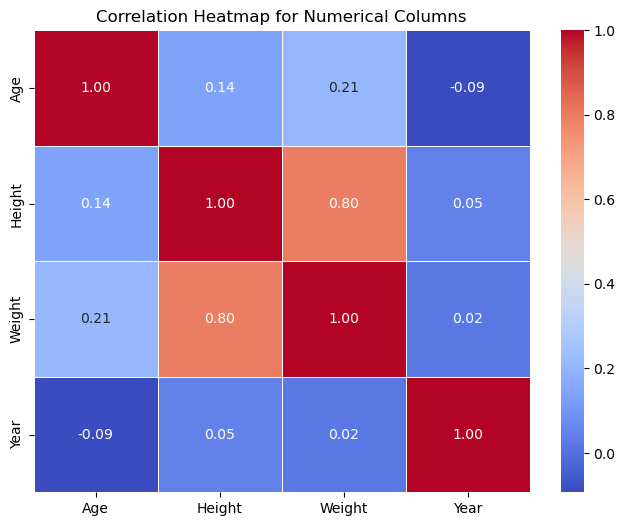

In [35]:
correlation_matrix = df1_numerical.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()